

---



---


# **Comparative Analysis of CNN and Convolutional KAN for Pneumonia Detection in Chest X-Rays**



---



---



**Tema: <i>Interactive Paper</i>**

Ditulis oleh:
- Riechie (01112210038)
- Vira Jessica (01112210045)
- Matthew Kurniawan (01087230002)
- Putra Rama Gustiantoro (01085210011)

<p align = "justify">$\qquad$Agar seluruh <i>code</i> dalam <I>Google Colaboratory</i> ini dapat dijalankan dengan baik, folder <i>Google Drive</i> berikut ini perlu di <i>download</i> terlebih dahulu, dan disimpan dalam <i>Google Drive</i> personal anda dengan nama "<i>Advanced Machine Learning</i>".

https://drive.google.com/drive/folders/1YmhaaiIyIoGWuG7cNVvK4NE88lvSi_2l?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch import optim
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import glob
import os
import keras
from tqdm import tqdm
import cv2
from collections import Counter
import time
import sys
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay
sys.path.append('/content/drive/MyDrive/Advanced Machine Learning/kan_convolutional')

from KANConv import KAN_Convolutional_Layer
from KANLinear import KANLinear

# **I. LATAR BELAKANG**


---



---



<p align="justify">
$\qquad$Dengan lebih dari 4 juta kematian setiap tahunnya, <i>pneumonia</i> merupakan salah satu penyakit yang paling mematikan bagi anak-anak dan lansia, terutama di negara-negara dengan akses terbatas ke layanan kesehatan [<a href="https://link.springer.com/article/10.1007/s11042-023-16419-1#citeas">1</a>]. Deteksi dini penyakit ini sangat penting untuk mengurangi angka kematian, dengan metode yang paling umum digunakan untuk diagnosis <i>pneumonia</i> adalah diagnosis citra <i>X-ray</i> [<a href = "https://www.sciencedirect.com/science/article/abs/pii/S001048252030247X">2</a>]. Namun, proses diagnosis berbasis citra <i>X-ray</i> seringkali memerlukan tenaga ahli radiologi, yang tidak selalu tersedia, terutama di wilayah dengan keterbatasan sumber daya medis. Oleh karena itu, diperlukan solusi otomatis yang andal untuk mendukung proses diagnosis.

<p align = "justify">
$\qquad$Seiring perkembangan teknologi, metode <i>deep learning</i> seperti <i>Convolutional Neural Network</i> (<i>CNN</i>) telah menjadi alat yang andal dalam deteksi penyakit berbasis citra, termasuk <i>pneumonia</i>, berkat kemampuannya menangkap pola-pola kompleks pada citra medis [<a href = "https://link.springer.com/article/10.1007/s11831-023-09898-w">3</a>]. Di sisi lain, <i>Convolutional Kolmogorov-Arnold Network</i> (<i>CKAN</i>) menawarkan pendekatan alternatif dengan memanfaatkan <i>layer convolutional</i> berbasis <i>spline</i> yang mampu menangkap hubungan non-linear secara lebih efektif [<a href = "https://arxiv.org/abs/2406.13155">4</a>]. Pendekatan ini tidak hanya berpotensi meningkatkan interpretabilitas model, tetapi juga efisiensi komputasi. Namun, penerapan <i>CKAN</i> dalam analisis medis, khususnya untuk deteksi penyakit berbasis citra, masih relatif jarang dieksplorasi, sehingga membuka peluang penelitian lebih lanjut di bidang ini.

<p align = "justify">
$\qquad$Penelitian ini bertujuan untuk mengevaluasi dan membandingkan kinerja <i>CNN</i> dan <i>CKAN</i> dalam mendeteksi <i>pneumonia</i> menggunakan citra <i>X-ray</i>. Evaluasi dilakukan dengan menitikberatkan pada aspek akurasi, efisiensi komputasi, dan generalisasi model. Dengan mengkaji potensi kedua pendekatan ini, penelitian diharapkan dapat memberikan kontribusi signifikan bagi pengembangan metode diagnostik otomatis yang andal, efisien, dan sesuai untuk diterapkan di berbagai kondisi, termasuk di wilayah dengan keterbatasan sumber daya.



# **II. STUDI LITERATUR**


---



---




<p align = "justify">
$\qquad$Penelitian sebelumnya telah banyak mengeksplorasi penggunaan <i>Deep Learning</i> (<i>DL</i>) untuk otomasi diagnosis penyakit berbasis citra. Di antara berbagai metode, <i>Convolutional Neural Network</i> (<i>CNN</i>) menjadi pilihan utama berkat kemampuannya dalam mengekstraksi fitur penting dari citra medis [<a href="https://www.researchgate.net/publication/358274478_Literature_review_efficient_deep_neural_networks_techniques_for_medical_image_analysis">5</a>]. Untuk mengatasi tantangan seperti waktu komputasi yang tinggi dan risiko <i>overfitting</i>, <i>Rahman et al.</i> [<a href = "https://www.mdpi.com/2076-3417/10/9/3233">6</a>] menerapkan <i>transfer learning</i> menggunakan model <i>pre-trained</i> seperti <i>AlexNet</i>, <i>ResNet18</i>, <i>DenseNet201</i>, dan <i>SqueezeNet</i>, untuk mendeteksi <i>pneumonia</i> menggunakan <I>Chest X-ray</i> (<i>CXR</i>), yang menghasilkan akurasi terbaik sebesar 98%. Di sisi lain, <i>Zhang et al.</i> [<a href = "https://www.mdpi.com/2079-9292/10/13/1512">7</a>] merancang arsitektur berbasis <i>VGG16</i> yang lebih ringan dan terbukti unggul dalam metrik seperti <i>AUC</i>, <i>precision</i>, dan <i>recall</i> dibandingkan model <i>pre-trained</i> lainnya.

<p align = "justify">
$\qquad$Pendekatan <i>ensemble learning</i> juga telah banyak digunakan dalam deteksi <i>pneumonia</i> menggunakan <i>CXR</i>. Penelitian oleh <i>Kundu et al.</i> [<a href = "https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0256630">8</a>] menunjukkan bahwa kombinasi <i>GoogleNet</i>, <i>ResNet-18</i>, dan <i>DenseNet121</i> mampu mengungguli masing-masing model secara individu. Sementara itu, <i>Yaseliani et al.</i> [<a href= "https://ieeexplore.ieee.org/document/9794709?denied=">9</a>] mengusulkan metode <i>hybrid CNN</i> dengan menggabungkan pendekatan <i>Fully-Connected Layer</i>, <i>Support Vector Machine</i> (<i>SVM</i>), dan <i>Logistic Regression</i> (<i>LR</i>), yang mencatat akurasi tertinggi sebesar 98,55%. Menariknya, penelitian <i>Harshvardhan et al.</i> [<a href = "https://jestec.taylors.edu.my/Vol%2016%20issue%201%20February%202021/16_1_61.pdf">10</a>] menunjukkan bahwa arsitektur <i>CNN</i> yang lebih sederhana sering kali menghasilkan kinerja yang lebih baik dibandingkan model yang lebih kompleks dalam mendeteksi <i>pneumonia</i> menggunakan <i>CXR</i>, menunjukkan bahwa kesederhanaan arsitektur dapat menjadi solusi yang efektif dan efisien tanpa mengorbankan akurasi.

<p align = "justify">
$\qquad$Algoritma <i>Kolmogorov-Arnold Network</i> (<i>KAN</i>) telah banyak digunakan dalam berbagai bidang [<a href = "https://ieeexplore.ieee.org/document/10731689?denied=">11</a>], dan mulai menarik perhatian sebagai alternatif dalam analisis citra medis. Penelitian oleh <i>Drokin</i> [<a href = "https://arxiv.org/pdf/2407.01092">12</a>] menunjukkan bahwa <i>Convolutional KAN</i> (<i>CKAN</i>), yaitu integrasi <i>KAN</i> ke dalam <i>CNN</i>, dapat meningkatkan efisiensi dan akurasi model. Selain itu, <i>Cheon</i> dan <i>Mun</i> [<a href = "https://www.mdpi.com/2072-4292/16/18/3417">13</a>] mengaplikasikan <i>CKAN</i> pada penginderaan jauh dan menemukan bahwa model ini menawarkan kecepatan lebih tinggi dengan akurasi yang setara dengan model <i>pre-trained</i> lainnya. Penelitian <i>Elaziz et al.</i> [<a href = "https://ieeexplore.ieee.org/document/10681070?denied=">14</a>] juga mendemonstrasikan keunggulan <i>CKAN</i> dalam mendeteksi intrusi <i>IoT</i>, dengan parameter lebih sedikit dibandingkan model <i>DL</i> lainnya.

<p align = "justify">
$\qquad$Meskipun <i>CKAN</i> telah menunjukkan potensinya dalam berbagai bidang, belum banyak penelitian yang secara khusus menerapkannya dalam analisis citra medis. Oleh karena itu, penelitian ini bertujuan untuk mengevaluasi kinerja <i>CNN</i> dan <i>CKAN</i> dalam mendeteksi <i>pneumonia</i> dari citra <i>X-ray</i>, dengan fokus pada akurasi, efisiensi, dan generalisasi model. Untuk menjaga validitas perbandingan, <i>transfer learning</i> tidak digunakan, mengingat arsitektur sederhana yang diuji pada kedua model serta keterbatasan ketersediaan model <i>pre-trained CKAN</i>.

# **III. DATA & METODOLOGI**


---



---



<p align = "justify">
$\qquad$<i>Dataset</i> yang digunakan dalam penelitian ini merupakan gambar <i>X-ray</i> dada yang diambil dalam posisi <i>anterior-posterior</i> (<i>AP</i>) dari pasien anak-anak berusia 1 hingga 5 tahun, terdiri dari citra pasien normal dan citra pasien yang mengidap <I>pneumonia</i>. Data ini diperoleh dari rekam medis retrospektif di <i>Guangzhou Women and Children’s Medical Center</i> dan dihasilkan sebagai bagian dari pemeriksaan rutin dalam perawatan klinis. <i>Dataset</i> ini bersumber dari <i>Mendeley Data</i> dengan judul "<i>Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification"</i>, disediakan oleh <i>Kermany et al.</i> [<a href = "https://data.mendeley.com/datasets/rscbjbr9sj/2">15</a>]. Contoh data normal dan data <i>pneumonia</i> ditampilkan pada gambar dibawah ini.
<br>
<center>
<figure style="display: flex; justify-content: space-between;">
<img src="https://drive.google.com/uc?export=view&id=1x4kKJTEidBcTIron5SkOcYwhHFjEX08Q" width ="300">
<figcaption align = "center">Normal</figcaption>
</figure>
</center>

<center>
<figure style="display: flex; justify-content: space-between;">
<img src="https://drive.google.com/uc?export=view&id=1xr9vq4kb89MKvQ8lQRpyGSAYiVRkbqXN" width ="300">
<figcaption align = "center"><i>Pneumonia</i></figcaption>
</figure>
</center>

## **3.1. Pra-Pemrosesan Data**


---



<p align = "justify">
$\qquad$Seluruh <i>dataset</i> telah diunduh dan disimpan dalam <i>Google Drive</i> penulis. Langkah pertama adalah membuat sebuah <i>subclass</i> bernama <code>ChestXrayDataset</code> yang bertugas mengambil data gambar dari <i>Google Drive</i>. <i>Subclass</i> ini akan mewarisi <i>class</i> <code>Dataset</code> yang disediakan oleh <code>PyTorch</code>.



In [ ]:
class ChestXrayDataset(Dataset):
    # Fungsi dibawah merupakan method untuk inisialisasi object dari class ini, argumen yang dibutuhkan meliputi
    # directory dari gambar-gambar yang ingin diambil, dan fungsi transformasi apa yang ingin dikenakan pada gambar.
    def __init__(self, root_dir, transform=None):
      self.root_dir = root_dir
      self.transform = transform
      self.image_paths = glob.glob(os.path.join(root_dir, '**/*.jpeg'), recursive=True)
      self.normal_paths = glob.glob(os.path.join(root_dir, 'NORMAL/*.jpeg'), recursive=True)
      self.pneumonia_paths = glob.glob(os.path.join(root_dir, 'PNEUMONIA/*.jpeg'), recursive=True)
      self.label_to_idx = {"NORMAL": 0, "PNEUMONIA": 1}
      self.augment = False
      self.minority_len = 0
      self.majority_len = 0
      self.augmentation = None
      self.minority_paths = None

    # Method dibawah berfungsi untuk mengembalikan banyaknya gambar yang terdapat dalam dataset
    def __len__(self):
      return len(self.image_paths)

    # Method dibawah berfungsi untuk mengembalikan banyaknya gambar dengan label 'NORMAL' pada dataset
    def __lenNormal__(self):
      return len(self.normal_paths)

    # Method dibawah berfungsi untuk mengembalikan banyaknya gambar dengan label 'Pneumonia' pada dataset
    def __lenPneumonia__(self):
      return len(self.pneumonia_paths)

    # Method dibawah digunakan apabila terdapat kasus imbalance pada dataset, dan kita ingin menyeimbangkan dataset dengan
    # melakukan augmentasi pada kelas minoritas, hingga jumlah gambar nya sama dengan kelas mayoritas.
    def __augment__(self, augmentation):
      self.ori_len = self.__len__()
      ## Kondisi if else dibawah ini berfungsi untuk menyimpan path kelas mayoritas, serta banyak data yang
      ## terdapat pada kelas mayoritas dan minoritas
      if self.__lenPneumonia__() < self.__lenNormal__():
        self.minority_paths = self.pneumonia_paths.copy()
        self.minority_len = self.__lenPneumonia__()
        self.majority_len = self.__lenNormal__()

      else:
        self.minority_paths = self.normal_paths.copy()
        self.minority_len = self.__lenNormal__()
        self.majority_len = self.__lenPneumonia__()

      ## Pada bagian ini, image path awal akan ditambah terus menerus dengan minority path
      ## hingga jumlah data sudah melebihi 2 kali majority path
      self.minority_paths_copy = self.minority_paths.copy()
      for i in range(round(self.majority_len / self.minority_len)):
        self.image_paths = self.image_paths + self.minority_paths_copy
        self.minority_paths = self.minority_paths + self.minority_paths_copy

      ## Kondisi if else dibawah berfungsi membatasi path kelas minoritas hanya hingga sebanyak kelas mayoritas
      if self.__lenPneumonia__() < self.__lenNormal__():
        self.pneumonia_paths = self.minority_paths[0:self.majority_len]

      else:
        self.normal_paths = self.minority_paths[0:self.majority_len]

      ## Bagian dibawah berfungsi membatasi image path hanya hingga sebanyak 2 kali kelas mayoritas (sehingga kedua kelas seimbang)
      self.image_paths = self.image_paths[0:2*self.majority_len]
      self.augmentation = augmentation
      self.augment = True

    # Method dibawah ini berfungsi mengambil gambar yang terdapat dalam directory berdasarkan index nya
    def __getitem__(self, idx):
      ## Bagian dibawah mengekstrak gambar dari path yang sudah ditentukan, dan diubah kedalam grayscale
      img_path = self.image_paths[idx]
      image = Image.open(img_path).convert("L")

      ## Label dari gambar akan di encode sebagai berikut: {'NORMAL': 0, 'PNEUMONIA':1}
      label_str = img_path.split(os.path.sep)[-2]
      label = self.label_to_idx[label_str]
      label = torch.tensor(label)

      ## Apabila augment bernilai True, maka gambar yang index nya melebihi ukuran awal dataset akan dikenakan augmentasi
      if self.augment:
        if idx >= self.ori_len:
          image = self.augmentation(image)

        else:
          if self.transform:
            image = self.transform(image)

      ## Apabila augment bernilai False, maka hanya akan dikenakan transformasi biasa
      else:
        if self.transform:
          image = self.transform(image)

      return image, label

<p align = "justify">
$\qquad$Berikutnya, perlu didefinisikan fungsi transformasi yang hendak dikenakan pada gambar. Pada penelitian ini, gambar akan diubah kedalam ukuran $64 \times 64$ <i>pixel</i>. Pemilihan ukuran gambar <i>input</i> ini merujuk pada beberapa penelitian terdahulu [<a href = "https://jestec.taylors.edu.my/Vol%2016%20issue%201%20February%202021/16_1_61.pdf">10</a>, <a href = "https://link.springer.com/chapter/10.1007/978-981-16-3071-2_30">16</a>] yang menemukan bahwa model dengan ukuran <i>input</i> sebesar $64 \times 64$ menghasilkan performa terbaik. Setelah ukuran gambar diubah, berikutnya gambar akan diubah kedalam bentuk <i>tensor</i> agar dapat diolah oleh model, dengan normalisasi nilai piksel ke rentang [0,1].

In [ ]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

<p align = "justify">
$\qquad$Apabila terjadi ketidakseimbangan (<i>imbalance</i>) pada <i>dataset</i>, yaitu perbedaan signifikan dalam jumlah data antar kelas, maka augmentasi data akan diterapkan untuk menyeimbangkan jumlah data di setiap kelas. Teknik augmentasi ini hanya diterapkan pada kelas minoritas dengan tujuan meningkatkan variasi data pada kelas tersebut, sehingga distribusi data menjadi seimbang. Proses ini dilakukan hingga kedua kelas memiliki jumlah data yang setara.

<p align = "justify">
$\qquad$Augmentasi data juga bertujuan untuk meningkatkan <i>robustness</i> model terhadap variasi kondisi data di dunia nyata, seperti perubahan rotasi, skala, pencahayaan, atau warna. Dengan demikian, model dapat lebih general dan tangguh terhadap data baru yang tidak terlihat selama pelatihan. Pada penelitian ini, beberapa teknik augmentasi data yang diterapkan adalah sebagai berikut.

<ul>
 <li><p align = "justify"><code>RandomResizedCrop</code>: Memotong area gambar secara acak dengan skala antara 80% hingga 100% dari ukuran asli, kemudian mengubahnya menjadi ukuran tetap $64 \times 64$ piksel. Augmentasi ini bertujuan untuk menambah variasi posisi dan ukuran objek pada gambar.</li>

 <li><p align = "justify"><code>RandomHorizontalFlip</code>: Membalik gambar secara horizontal dengan probabilitas 50%. Teknik ini bertujuan untuk membuat model lebih tangguh terhadap perubahan orientasi horizontal.</li>

 <li><p align = "justify"><code>RandomRotation</code>: Memutar gambar secara acak hingga ±15 derajat. Augmentasi ini dirancang untuk meningkatkan kemampuan model dalam mengenali pola pada gambar yang mengalami rotasi kecil.

 <li><p align = "justify"><code>ColorJitter</code>: Memodifikasi atribut warna gambar secara acak dengan tingkat perubahan hingga ±20% untuk kecerahan, kontras, dan saturasi, serta ±0.1 untuk hue. Augmentasi ini bertujuan untuk meningkatkan kemampuan model dalam menghadapi variasi pencahayaan dan warna pada gambar.</li>

 <li><p align = "justify"><code>ToTensor</code>: Mengubah gambar menjadi format tensor yang dapat digunakan oleh PyTorch, dengan normalisasi nilai piksel ke rentang [0, 1]. Proses ini memastikan data sesuai untuk diproses oleh model deep learning.</li>
</ul>

In [ ]:
augmentations = transforms.Compose([
            transforms.RandomResizedCrop(size=64, scale=(0.8, 1.0)),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomRotation(degrees = 15),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
            transforms.ToTensor(),
        ])

<p align = "justify">
$\qquad$Setelah mendefinisikan fungsi transformasi dan fungsi agumentasi, langkah berikutnya adalah menginstansiasi objek dari <i>Subclass</i> <code>ChestXrayDataset</code> guna menampung data gambar dari <i>Google Drive</i>. <i>Dataset</i> terdiri dari tiga bagian, yaitu data <i>training</i>, data <i>testing</i>, dan data validasi. Masing-masing data ini akan ditampung dalam objek yang berbeda-beda.

In [ ]:
# Data Training
train_data_dir = '/content/drive/MyDrive/Advanced Machine Learning/chest_xray/train'
train_dataset = ChestXrayDataset(root_dir=train_data_dir, transform=transform)
print(f"Number of training samples: {train_dataset.__len__()}")
print(f"Number of normal cases: {train_dataset.__lenNormal__()}")
print(f"Number of pneumonia cases: {train_dataset.__lenPneumonia__()}")

# Data Testing
test_data_dir = '/content/drive/MyDrive/Advanced Machine Learning/chest_xray/test'
test_dataset = ChestXrayDataset(root_dir=test_data_dir, transform=transform)
print(f"\nNumber of testing samples: {test_dataset.__len__()}")
print(f"Number of normal cases: {test_dataset.__lenNormal__()}")
print(f"Number of pneumonia cases: {test_dataset.__lenPneumonia__()}")

# Data Validasi
val_data_dir = '/content/drive/MyDrive/Advanced Machine Learning/chest_xray/val'
val_dataset = ChestXrayDataset(root_dir=val_data_dir, transform=transform)
print(f"\nNumber of validation samples: {val_dataset.__len__()}")
print(f"Number of normal cases: {val_dataset.__lenNormal__()}")
print(f"Number of pneumonia cases: {val_dataset.__lenPneumonia__()}")

Number of training samples: 5216
Number of normal cases: 1341
Number of pneumonia cases: 3875

Number of testing samples: 624
Number of normal cases: 234
Number of pneumonia cases: 390

Number of validation samples: 16
Number of normal cases: 8
Number of pneumonia cases: 8


<p align = "justify">
$\qquad$Dapat terlihat bahwa tiga objek sudah berhasil diinstansiasi untuk mengambil masing-masing <i>dataset</i>. Ukuran dari data <i>training</i>, <i>testing</i>, dan validasi secara berturut-turut adalah 5216, 624, dan 8. Tampak bahwa ukuran antar label dalam data <i>training</i> tidak seimbang, yang menandakan adanya <i>imbalance</i>.

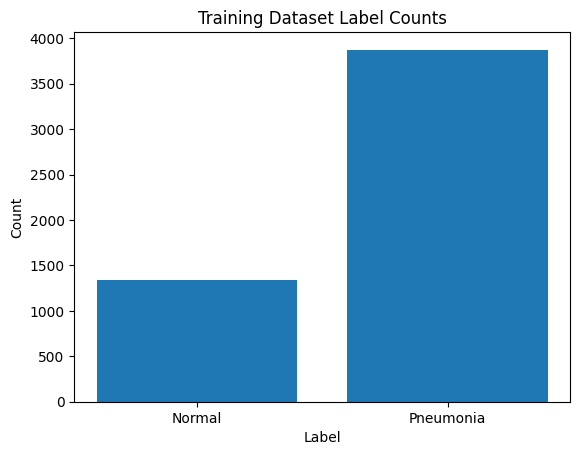

In [ ]:
# Plot ukuran masing-masing label dalam data training
plt.bar(['Normal', 'Pneumonia'], [train_dataset.__lenNormal__(), train_dataset.__lenPneumonia__()])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Training Dataset Label Counts')
plt.show()

<p align="justify">
$\qquad$Hasil visualisasi distribusi ukuran masing-masing kelas dalam data <i>training</i> menunjukkan adanya fenomena <i>imbalance</i>. Kelas normal hanya terdiri dari 1.341 data, sedangkan kelas <i>pneumonia</i> terdiri dari 3.875 data. Untuk mengatasi ketidakseimbangan ini, seperti yang telah dijelaskan sebelumnya, akan dilakukan augmentasi data pada kelas minoritas, yaitu kelas normal, hingga jumlahnya seimbang dengan kelas <i>pneumonia</i>.
Sebelum proses augmentasi dilakukan, sebuah objek baru akan diinstansiasi untuk mengambil data gambar tanpa penerapan augmentasi. Model <i>CNN</i> dan <i>CKAN</i> akan dilatih menggunakan <i>dataset</i> sebelum dan sesudah augmentasi, dan hasil performa dari kedua pendekatan ini akan dibandingkan.

In [ ]:
# Menyiapkan objek baru untuk mengambil data training tanpa augmentasi
train_dataset_noaugment = ChestXrayDataset(root_dir=train_data_dir, transform=transform)

In [ ]:
# memanggil method augment yang terdapat dalam subclass ChestXrayDataset, tujuannya adalah menyeimbangkan kedua kelas
train_dataset.__augment__(augmentation = augmentations)

Setelah menerapkan augmentasi data pada data <i>training</i>, berikut nya akan diperiksa kembali ukuran masing-masing kelas dalam data <i>training</i> untuk memastikan bahwa proses augmentasi berjalan dengan lancar.

In [ ]:
print(f"Number of training samples: {train_dataset.__len__()}")
print(f"Number of normal cases: {train_dataset.__lenNormal__()}")
print(f"Number of pneumonia cases: {train_dataset.__lenPneumonia__()}")

Number of training samples: 7750
Number of normal cases: 3875
Number of pneumonia cases: 3875


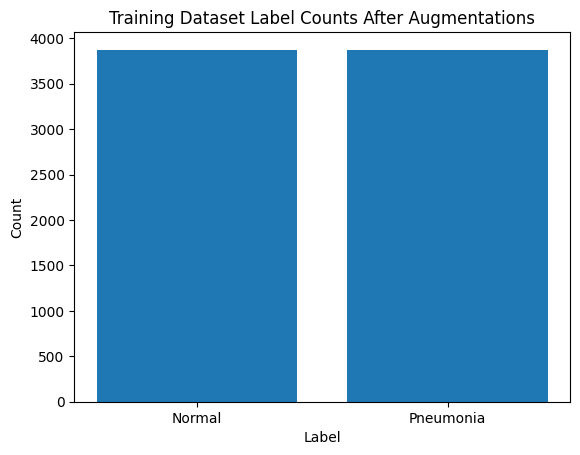

In [ ]:
# Plot ukuran masing-masing kelas dalam data training setelah melakukan augmentasi data
plt.bar(['Normal', 'Pneumonia'], [train_dataset.__lenNormal__(), train_dataset.__lenPneumonia__()])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Training Dataset Label Counts After Augmentations')
plt.show()

<p align = "justify">
$\qquad$Dapat terlihat bahwa kedua kelas dalam data <i>training</i> kini memiliki ukuran yang sama, yaitu 3875. Hal ini menandakan bahwa proses augmentasi berjalan dengan lancar, dan data sudah siap untuk diolah oleh model <i>deep learning</i>. Namun, untuk meringankan memori dan mempermudah proses pelatihan, data akan dipecah dalam <i>batch-batch</i> kecil dengan ukuran 32, sehingga model tidak perlu mempelajari seluruh <i>dataset</i> sekaligus. Implementasi akan memanfaatkan <i>Class</i> <code>DataLoader</code> yang disediakan oleh <code>Pytorch</code>.

In [ ]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
train_loader_noaugment = DataLoader(train_dataset_noaugment, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size= test_dataset.__len__(), shuffle=False)
val_loader = DataLoader(val_dataset, batch_size = val_dataset.__len__(), shuffle=False)

Untuk memastikan bahwa data dapat diambil dengan baik, akan diperiksa gambar serta label yang terdapat dalam satu <i>batch</i> data <i>training</i> sebelum augmentasi.

In [ ]:
data_iter_noaugment = iter(train_loader_noaugment)
images, labels = next(data_iter_noaugment)
print(f"[INFO] Loaded batch with {len(images)} images and labels.")

[INFO] Loaded batch with 32 images and labels.


<p align = "justify">
$\qquad$Terlihat bahwa benar terdapat 32 gambar dan label dalam satu <i>batch</i>. Hal ini menandakan bahwa gambar serta label dapat diekstrak dengan baik menggunakan <code>DataLoader</code>. Berikutnya, akan divisualisasikan seluruh gambar serta label yang terdapat dalam satu <i>batch</i>. Visualisasi ini akan ditampilkan dalam grid dengan ukuran $8 \times 4$.

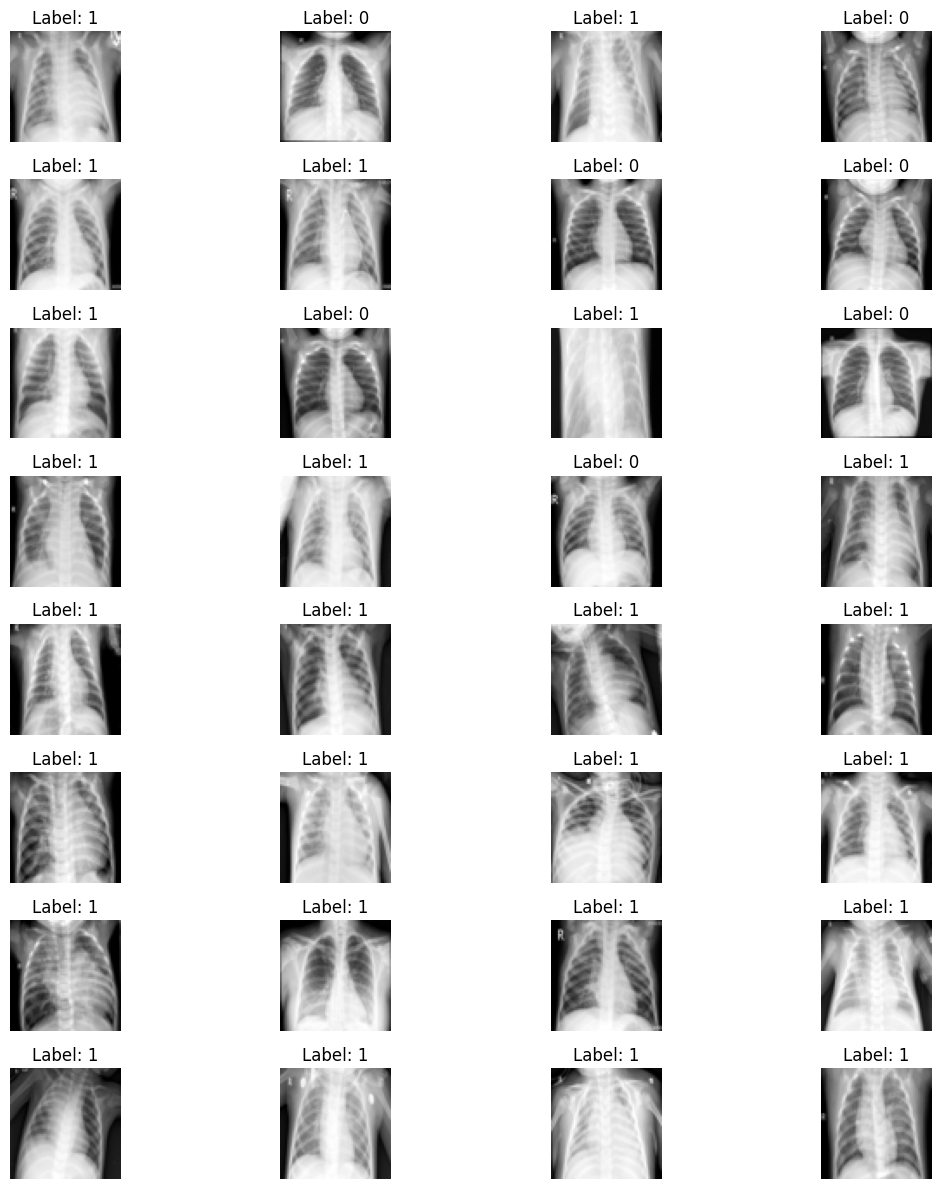

In [ ]:
# Membuat grid subplots dengan ukuran 8 x 4
fig, axes = plt.subplots(8, 4, figsize=(12, 12))

# Loop untuk setiap gambar dalam batch, dan menampilkan gambar nya
for i in range(32):  # batch_size = 32
    row, col = divmod(i, 4)  # Mendapatkan index baris dan kolom untuk grid 8 x 4
    axes[row, col].imshow(images[i].permute(1, 2, 0), cmap='gray')  # Mengubah (C, H, W) -> (H, W, C)
    axes[row, col].set_title(f"Label: {labels[i].item()}")
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

Data <i>training</i> tanpa augmentasi sudah tervisualisasi dengan baik. Berikutnya, tahapan yang sama juga akan dilakukan pada data <i>training</i> setelah augmentasi, untuk memastikan bahwa memang benar kelas minoritas sudah teraugmentasi dengan baik.

In [ ]:
data_iter = iter(train_loader)
images, labels = next(data_iter)
print(f"[INFO] Loaded batch with {len(images)} images and labels.")

[INFO] Loaded batch with 32 images and labels.


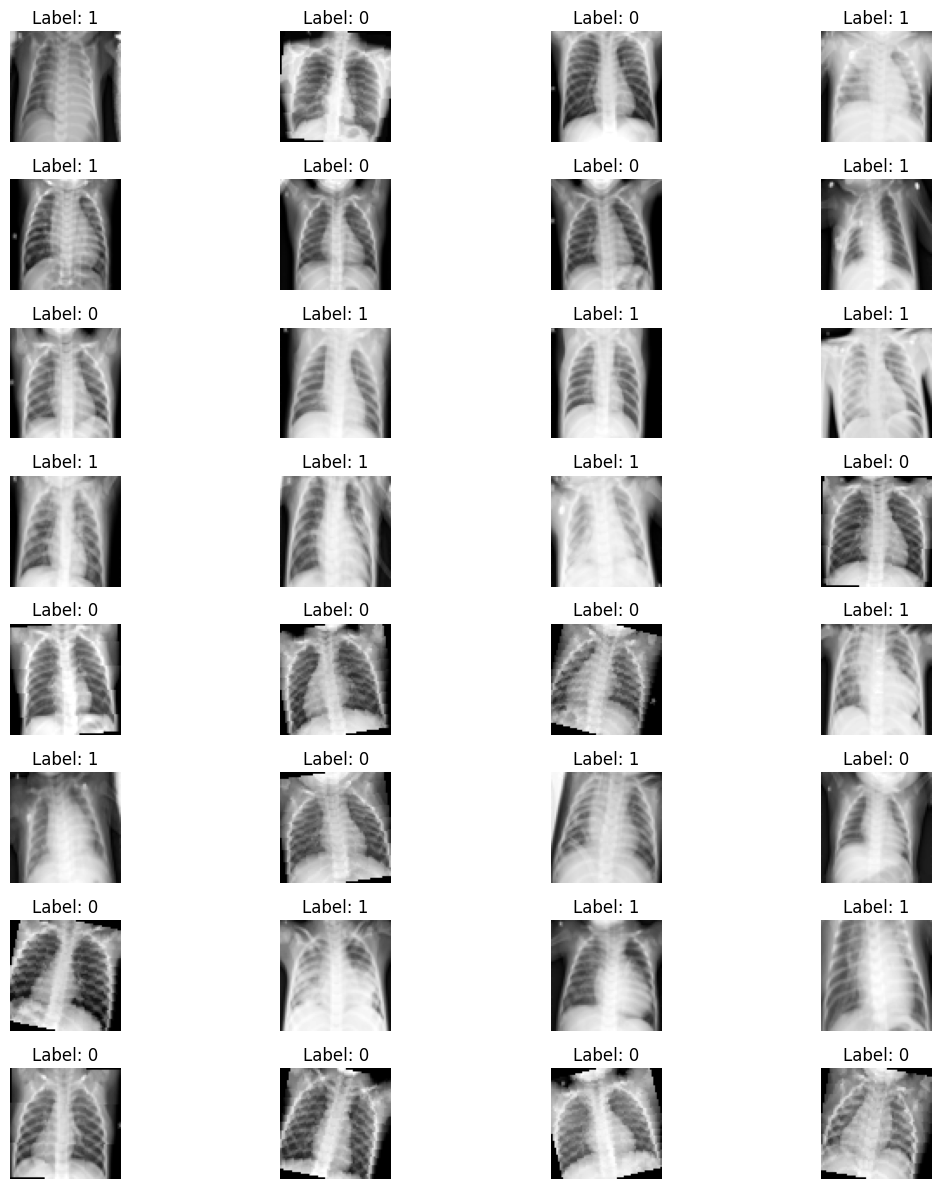

In [ ]:
# Membuat grid subplots dengan ukuran 8 x 4
fig, axes = plt.subplots(8, 4, figsize=(12, 12))

# Loop untuk setiap gambar dalam batch, dan menampilkan gambar nya
for i in range(32):  # batch_size = 32
    row, col = divmod(i, 4)  # Mendapatkan index baris dan kolom untuk grid 8 x 4
    axes[row, col].imshow(images[i].permute(1, 2, 0), cmap='gray')  # Mengubah (C, H, W) -> (H, W, C)
    axes[row, col].set_title(f"Label: {labels[i].item()}")
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

<p align = "justify">
$\qquad$Terlihat bahwa beberapa gambar dengan label 0 (normal) telah mengalami augmentasi, yang menandakan bahwa proses augmentasi telah berhasil diterapkan dengan benar. Selain itu, pengambilan gambar melalui <code>DataLoader</code> juga berjalan sesuai harapan. Selanjutnya, ukuran <i>tensor</i> gambar akan diperiksa untuk memastikan bahwa dimensinya telah sesuai dengan yang diinginkan, yaitu $64 \times 64$ piksel, dan rentang nilai nya sudah berada diantara 0 hingga 1.

In [ ]:
images[0]

tensor([[[0.6314, 0.6196, 0.5804,  ..., 0.1529, 0.2196, 0.3333],
         [0.6392, 0.6235, 0.5922,  ..., 0.1843, 0.2627, 0.4549],
         [0.6510, 0.6353, 0.6000,  ..., 0.5922, 0.6706, 0.7608],
         ...,
         [0.0353, 0.0235, 0.1216,  ..., 0.1098, 0.2588, 0.4000],
         [0.0353, 0.0235, 0.1255,  ..., 0.0745, 0.2510, 0.4078],
         [0.0353, 0.0196, 0.1255,  ..., 0.0588, 0.2157, 0.4000]]])

In [ ]:
images[0].shape

torch.Size([1, 64, 64])

<p align = "justify">
$\qquad$Rentang nilai dalam <i>tensor</i> sudah berada dalam rentang 0 hingga 1. Selain itu, ukuran dari <i>tensor</i> adalah <code>[1, 64, 64]</code>, yang memiliki arti <i>tensor</i> terdiri dari satu <i>channel</i> yang berukuran $64 × 64$. Maka pra-pemrosesan data sudah berjalan sesuai harapan, dan data sudah siap untuk diolah oleh model <i>machine learning</i>.

## **3.2. Artificial Neural Network**
- - -

<p align = "justify">
$\qquad$<i>Artificial Neural Network (ANN)</i> merupakan model komputasi yang terinspirasi dari cara kerja otak manusia, terdiri dari <i>node-node</i> yang saling terhubung dan diorganisir dalam lapisan-lapisan [<a href = "https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=10054036">17</a>]. Setiap <i>node</i> atau <i>neuron</i> buatan ini menerima <i>input</i>, memproses informasi menggunakan bobot serta fungsi aktivasi, dan menghasilkan <i>output</i> yang dapat diteruskan ke <i>neuron</i> lainnya. <i>ANN</i> memiliki kemampuan untuk mempelajari pola dari data melalui proses pelatihan, di mana bobot koneksi antar <i>neuron</i> terus diperbarui untuk meminimalkan <i>error</i> antara <i>output</i> yang diprediksi dengan <i>output</i> yang diharapkan, proses ini dikenal dengan <i>backpropagation</i>. Terdapat tiga jenis <i>layer</i> dalah sebuah arsitektur <i>ANN</i>, yaitu <i>input layer</i>, <i>hidden layer</i>, dan <i>output layer</i>.

<p align = "justify">
$\qquad$Notasikan $a_i^l$ sebagai <i>node</i> ke-$i$ pada <i>layer</i> ke-$l$, di mana $l=1,2,\ldots,L$ dan $L$ adalah jumlah <i>layer</i>, maka nilai untuk $a_i^l$ ditentukan oleh seluruh <i>node</i> yang ada pada <i>layer</i> sebelumnya, serta <i>weight</i> masing-masing <i>node</i> tersebut khusus untuk <i>node</i> $a_i^l$. Notasikan $\theta_{ij}^l$ sebagai <i>weight</i> atau bobot dari <i>node</i> ke-$j$ pada <i>layer</i> ke-$l$ untuk <i>node</i> ke-$i$ pada <i>layer</i> $l+1$. Dalam <i>ANN</i>, untuk sebuah <i>node</i> pada <i>hidden layer</i>, hasil kombinasi linier dari <i>node-node layer</i> sebelumnya akan dikenakan fungsi aktivasi $\sigma$ untuk memberikan nilai akhir <i>node</i> tersebut. Misalkan layer $l$ dalam sebuah arsitektur <i>ANN</i> terdiri dari $n$ nodes, maka nilai untuk $a_i^{l+1}$ didapatkan dengan persamaan berikut,

\begin{equation}
a_i^{l+1}=\sigma(\theta_{i0}^l+\theta_{i1}^la_1^l+\theta_{i2}^la_2^l+\ldots+\theta_{in}^la_n^l).
\tag{1}
\end{equation}

## **3.3. Kolmogorov-Arnold Network**
- - -

<p align = "justify">$\qquad$<i>Kolmogorov-Arnold Network</i> (<i>KAN</i>) adalah arsitektur <i>neural network</i> yang didasarkan pada teorema representasi <i>Kolmogorov-Arnold</i>, yang menyatakan bahwa setiap fungsi kontinu multivariat dapat direpresentasikan sebagai kombinasi dari fungsi-fungsi univariat [<a href = "https://arxiv.org/abs/2404.19756">18</a>]. Berbeda dari <i>MLP</i> tradisional yang menggunakan fungsi aktivasi tetap pada <i>node</i>, <i>KAN</i> mengimplementasikan fungsi aktivasi yang dapat dipelajari pada ujung jaringan. Fungsi aktivasi ini menggantikan bobot-bobot yang terdapat dalam <i>MLP tradisional</i>. Teorema representasi <i>Kolmogorov-Arnold</i> menyatakan bahwa sebuah fungsi multivariat $f(x_1,x_2,\ldots,x_n)$ dapat diekspresikan sebagai berikut,

\begin{equation}
f(x_1,x_2,\ldots,x_n) = \sum_{q=1}^{2n+1}{\Phi_q\left(\sum_{p=1}^{n}{\phi_{q,p}(x_p)}\right)},
\tag{2}
\end{equation}

<p align = "justify">$\qquad$di mana $\phi_{q,p}$ adalah fungsi univariat yang memetakan setiap variabel <i>input</i> $(x_p)$ sehingga $\phi_{q,p}:[0,1] \rightarrow \mathbb{R}$, dan $\Phi_q: \mathbb{R} \rightarrow \mathbb{R}$ adalah fungsi univariat. Setiap <i>layer</i> dalam <i>KAN</i> merupakan matriks dari fungsi satu dimensi ini. Struktur keseluruhan dari <i>KAN</i> didefinisikan sebagai berikut,

\begin{equation}
KAN(x) = (\Phi_{L-1}\circ \Phi_{L-2} \circ \cdots \circ \Phi_{0})(x),
\tag{3}
\end{equation}

<p align = "justify">$\qquad$ di mana $L$ adalah jumlah <i>layer</i> dalam jaringan. <i>KAN</i> menunjukkan performa yang menjanjikan dalam memprediksi parameter sistem yang kompleks dengan menggunakan lebih sedikit parameter dibandingkan arsitektur <i>neural network</i> konvensional. Keunggulan utama <i>KAN</i> terletak pada kemampuannya untuk mengaproksimasikan hubungan non-linear dengan akurat menggunakan struktur yang lebih sederhana.

## **3.4. Convolutional Neural Network**
- - -

<p align = "justify">$\qquad$<i>Convolutional Neural Network</i> (<i>CNN</i>) adalah jenis arsitektur <i>deep learning</i> yang khusus dirancang untuk mengolah data dengan topologi <i>grid</i>, seperti citra [<a href = "https://ieeexplore.ieee.org/abstract/document/9451544">19</a>]. <i>CNN</i> terdiri dari dua tipe <i>layer</i>, yaitu <i>convolutional layer</i> dan <i>dense layer</i> (dalam konteks ini, <i>dense layer</i> merujuk pada <i>ANN layer</i>). Ilustrasi arsitektur sebuah <i>CNN</i> ditampilkan pada gambar berikut.

<center>
<figure style="display: flex; justify-content: space-between;">
<img src="https://drive.google.com/uc?export=view&id=1sHFOCq9wVpoCt6kUTKakBeEysP7ufoVc" width ="500">
<figcaption align = "center"><i>Ilustrasi Arsitektur <i>CNN</i></i></figcaption>
</figure>
</center>

<p align = "justify">
$\qquad$<i>Convolutional layer</i> memanfaatkan operasi konvolusi untuk mengekstraksi fitur-fitur penting dari <i>input</i>, dengan setiap lapisan menangkap pola visual pada tingkat abstraksi yang berbeda. Operasi ini dilakukan menggunakan <i>kernel</i>, yaitu matriks kecil yang bergerak melintasi citra untuk mendeteksi pola seperti tepi, tekstur, atau bentuk. Relasi spasial yang diperoleh dari operasi ini sangat penting dalam membedakan karakteristik antara dua objek citra. Secara matematis, operasi konvolusi antara dua fungsi $f(t)$ dan $g(t)$ didefinisikan oleh persamaan berikut,

 \begin{equation}
 (f \ast g)(t):=\int_{-\infty}^{\infty} f(\tau) g(t-\tau) d \tau
 \tag{4}
\end{equation}

<p align = "justify">$\qquad$Setelah <i>convolutional layer</i>, <i>pooling layer</i> diterapkan untuk mengurangi dimensi spasial fitur yang diekstraksi sambil mempertahankan informasi penting. Pada akhirnya, fitur yang telah diproses melalui lapisan konvolusi dan <I>pooling</I> akan diratakan (<i>flatten</i>) dan diteruskan ke <i>dense layer</i> atau <i>multi-layer perceptron</i> (<i>MLP</i>). <i>Dense layer</i> ini berfungsi untuk memproses informasi secara lebih terstruktur dan menghasilkan prediksi akhir. Arsitektur ini telah terbukti sangat efektif dalam berbagai tugas <i>computer vision</i>, termasuk klasifikasi gambar, deteksi objek, dan segmentasi semantik.

## **3.5. Convolutional Kolmogorov-Arnold Network**
- - -

<p align = "justify">$\qquad$Ide utama dari <i>Convolutional Kolmogorov-Arnold Network (CKAN)</i> adalah menggunakan algoritma <i>KAN</i> pada <i>dense layer</i> dari sebuah arsitektur <i>CNN</i>. Namun, <i>Bodner et al.</i> [<a href = "https://arxiv.org/abs/2406.13155">4</a>] mengembangkan konsep ini dengan menerapkan teorema <i>Kolmogorv-Arnold</i> pada <i>convolutional layer</i>, dinamakan sebagai <i>KAN convolutional layer</i>. Perbedaan utama antara <i>KAN convolutional layer</i> dan <i>convolutional layer</i> sederhana terletak pada <i>kernel</i> yang digunakan, di mana pada <i>CNN</i> <i>kernel</i> nya terdiri dari bobot-bobot, sementara pada <i>KAN convolutional layer</i>, setiap elemen dalam <i>kernel</i>, $\phi$, merupakan fungsi non-linear menggunakan <i>B-Spline</i> yang mampu dipelajari. Secara matematis, setiap elemen dalam <i>kernel</i> diberikan oleh persamaan berikut,

\begin{equation}
\phi = w_1 \cdot spline(x) + w_2 \cdot silu(x),
\tag{5}
\end{equation}

<p align = "justify">$\qquad$di mana $w_1$ dan $w_2$ adalah parameter bobot. Misalkan $K \in \mathbb{R}^{N \times M}$ adalah <I>kernel KAN convolutional</i>, dan representasi matriks dari sebuah citra berukuran $p \times h$ adalah sebagai berikut,

\begin{equation}
I = \begin{bmatrix} a_{11} & a_{12} & \ldots & a_{1p}\\
a_{21} & a_{22} & \ldots & a_{2p}\\
\vdots & \vdots & \ddots & \vdots\\
a_{h1} & a_{h2} & \ldots & a_{hp}
\end{bmatrix},
\end{equation}

<p align ="justify">$\qquad$maka konvolusi <i>KAN</I> didefinisikan oleh persamaan di bawah ini,

\begin{equation}
(I \ast K)_{i,j} = \sum_{k = 1}^{N}{\sum_{l=1}^{M}{\phi_{k,l}(a_{i+k,j+l})}}
\tag{6}
\end{equation}

## **3.6. Arsitektur Model**


---



<p align = "justify">
$\qquad$Penelitian ini menggunakan model <i>Convolutional Neural Network</i> (<i>CNN</i>) sebagai <i>baseline</i>, sementara model yang diusulkan adalah <i>Convolutional Kolmogorov-Arnold Network</i> (<i>CKAN</i>). Terdapat tiga variasi <i>CKAN</i> yang dirancang, yaitu: (1) kombinasi antara <i>convolutional layer</i> dan <i>KAN layer</i>, (2) kombinasi antara <i>KAN convolutional layer</i> dan <i>Fully Connected</i> (<I>MLP</i>) <i>layer</i>, serta (3) kombinasi antara <i>KAN Convolutional layer</i> dan <i>KAN layer</i>. Untuk setiap model, dilakukan pengujian terhadap dua arsitektur dengan tingkat kompleksitas yang berbeda, yaitu arsitektur sederhana dan arsitektur kompleks. Gambaran lengkap mengenai model yang diuji beserta detail arsitekturnya dapat dilihat pada gambar berikut.

<center>
<figure style="display: flex; justify-content: space-between;">
<img src="https://drive.google.com/uc?export=view&id=1fa3VGJqAKnBzXaSF38bRiaza9AqZbGKc" width ="500">
<figcaption align = "center"><i>Proposed Models</i></figcaption>
</figure>
</center>

<p align = "justify">
$\qquad$Pada model <i>CNN</i>, fungsi aktivasi yang digunakan pada <i>convolutional layer</i> dan <i>fully connected</i> (<i>FC</i>) <i>layer</i> adalah <i>Rectified Linear Unit</i> (<i>ReLU</i>). Sementara itu, fungsi aktivasi pada model berbasis <i>KAN</i> dipelajari secara otomatis selama proses pelatihan. Ukuran kernel yang digunakan pada <i>convolutional layer</i> dan <i>KAN convolutional layer</i> adalah $3 × 3$, dengan stride sebesar 1 tanpa <i>padding</i>. Untuk <i>pooling layer</i>, ukuran kernel yang digunakan adalah $2 × 2$. Pada model berbasis <i>KAN</i>, ukuran <i>grid</i> yang digunakan adalah 5, sementara nilai untuk <i>B-Spline degree</i> adalah 3.

<p align = "justify">
$\qquad$Seluruh pemilihan hiperparameter ini didasarkan pada penelitian yang dilakukan oleh <i>Bodner et al.</i> [<a href = "https://arxiv.org/abs/2406.13155">4</a>], kecuali untuk model <i>CNN</i> dengan arsitektur kompleks. Model <i>CNN</i> dengan arsitektur kompleks mengacu pada penelitian <i>Harshvardhan et al.</i> [<a href = "https://jestec.taylors.edu.my/Vol%2016%20issue%201%20February%202021/16_1_61.pdf">10</a>], di mana parameter regularisasi <i>dropout</i> digunakan untuk mencegah <i>overfitting</i>. Pada arsitektur ini, ukuran kernel <i>convolutional</i> dan <i>pooling layer</i> bervariasi di setiap <i>layer</i> untuk meningkatkan kemampuan ekstraksi fitur.

<p align = "justify">
$\qquad$Pada <i>output layer</i> dari seluruh model, terdapat 2 <i>node</i> yang mewakili dua kelas (normal dan <i>pneumonia</i>). Fungsi <i>softmax</i> diterapkan pada <i>output layer</i> untuk menghasilkan probabilitas keanggotaan kelas, sehingga prediksi akhir dapat diinterpretasikan secara langsung sebagai probabilitas.



### **Model CNN**

<p align = "justify">
$\qquad$<i>Code</i> dibawah ini mendefinisikan sebuah subclass bernama <code>SimpleCNN</code>, yang merupakan model <i>CNN</i> sederhana yang terdiri dari dua <i>convolutional layer</i>, dua <i>max pooling layer</i>, dan satu <i>fully connected</i> (<i>MLP</i>) <i>layer</i>. Setiap <i>convolutional layer</i> menggunakan fungsi aktivasi <i>ReLU</i> untuk ekstraksi fitur, diikuti oleh <i>max pooling</i> untuk mengurangi dimensi spasial. <i>Output</i> terakhir diubah menjadi vektor satu dimensi menggunakan <i>layer flatten</i>, dan diteruskan ke <i>MLP layer</i> untuk menghasilkan prediksi dengan jumlah <i>node</i> sesuai jumlah kelas (<code>num_classes</code>), yaitu dua.

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 5, kernel_size=3, padding=(0,0))
        self.conv2 = nn.Conv2d(5, 5, kernel_size=3, padding=(0,0))

        self.maxpool = nn.MaxPool2d(kernel_size=2)

        self.flatten = nn.Flatten()
        self.fc = nn.Linear(5 * 14 * 14, num_classes)
        self.name = "CNN (Small)"

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.maxpool(x)
        x = F.relu(self.conv2(x))
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.fc(x)

        return x

<p align="justify"> $\qquad$<i>Code</i> di bawah ini mendefinisikan sebuah <i>subclass</i> bernama <code>CNN</code>, yang merupakan model <i>CNN</i> dengan arsitektur kompleks yang terdiri dari dua <i>convolutional layer</i>, dua <i>max pooling layer</i>, dan empat <i>fully connected</i> (<i>FC</i>) <i>layer</i>. <i>Convolutional layer</i> pertama mengekstraksi 64 fitur dengan ukuran kernel $9 × 9$, diikuti oleh <i>max pooling</i> dengan ukuran kernel $4 × 4$ untuk mengurangi dimensi spasial. <i>Convolutional layer</i> kedua menghasilkan 32 fitur dengan ukuran kernel $3 × 3$, diikuti oleh <i>max pooling</i> dengan kernel $2 × 2$. Setelah proses ekstraksi fitur, data diubah menjadi vektor satu dimensi menggunakan <i>flatten layer</i> dan diteruskan melalui empat <i>FC layer</i>, dengan fungsi aktivasi <i>ReLU</i> di setiap lapisan. Regularisasi <i>dropout</i> diterapkan di berbagai tahap untuk mengurangi risiko <i>overfitting</i>. Lapisan terakhir menghasilkan prediksi dengan jumlah <i>node</i> sesuai jumlah kelas (<code>num_classes</code>), yaitu dua.

In [ ]:
class CNN(nn.Module):
  def __init__(self, in_channels, num_classes):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(
        in_channels=in_channels,
        out_channels=64,
        kernel_size=(9, 9),
        stride=(1, 1),
        padding=(4, 4)
    )
    self.pool1 = nn.MaxPool2d(kernel_size=(4, 4), stride=(4, 4))
    self.conv2 = nn.Conv2d(
        in_channels=64,
        out_channels=32,
        kernel_size=(3, 3),
        stride=(1, 1),
        padding=(1, 1)
    )
    self.pool2 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
    self.flat = nn.Flatten()
    self.fc1 = nn.Linear(32 * 8 * 8, 128)
    self.fc2 = nn.Linear(128, 128)
    self.fc3 = nn.Linear(128, 128)
    self.fc4 = nn.Linear(128, num_classes)
    self.name = "CNN"

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool1(x)
    x = F.dropout(x, p=0.2)
    x = F.relu(self.conv2(x))
    x = self.pool2(x)
    x = F.dropout(x, p=0.4)
    x = self.flat(x)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, p=0.3)
    x = F.relu(self.fc2(x))
    x = F.dropout(x, p=0.3)
    x = F.relu(self.fc3(x))
    x = F.dropout(x, p=0.3)
    x = self.fc4(x)
    return x

### **Model CKAN**

<p align="justify"> $\qquad$<i>Code</i> di bawah ini mendefinisikan sebuah <i>subclass</i> bernama <code>CKAN</code>, yang merupakan model kombinasi dari <i>convolutional layer</i> dan <KAN layer</i> dengan arsitektur sederhana. Model ini terdiri dari dua <i>convolutional layer</i>, dua <i>max pooling layer</i>, dan satu <i>KAN layer</i>. <i>Convolutional layer</i> pertama mengekstraksi lima fitur dengan ukuran kernel 3 × 3, diikuti oleh <i>max pooling</i> dengan kernel berukuran 2 × 2 untuk mengurangi dimensi spasial. Proses ini dilanjutkan dengan <i>convolutional layer</i> kedua yang juga menghasilkan lima fitur dengan parameter yang serupa, sebelum kembali melalui tahap <i>max pooling</i>.

<p align = "justify">$\qquad$Setelah fitur diekstraksi, data diubah menjadi vektor satu dimensi melalui <i>flatten layer</i> dan diteruskan ke <i>KAN layer</i> (<code>KANLinear</code>). <i>KAN layer</i> menggunakan fungsi spline berbasis grid dengan ukuran grid yang dapat dikonfigurasi (<code>grid_size</code>), serta parameter seperti <i>spline order</i>, <i>scale noise</i>, dan <i>grid range</i> untuk memetakan hubungan non-linear secara lebih efektif. Fungsi aktivasi <code>SiLU</code> digunakan pada layer ini untuk meningkatkan efisiensi pembelajaran. Lapisan akhir menghasilkan prediksi dengan jumlah <i>node</i> sesuai dengan jumlah kelas (<code>num_classes</code>). Model ini dirancang untuk menangkap hubungan non-linear yang kompleks secara efisien dengan memanfaatkan keunggulan <i>Kolmogorov-Arnold Network</i>.

In [ ]:
class CKAN(nn.Module):
    def __init__(self, num_classes, grid_size=5):
        super(CKAN, self).__init__()
        # Convolutional layer, assuming an input with 1 channel (grayscale image)
        self.conv1 = nn.Conv2d(1, 5, kernel_size=3, padding=(0,0))
        self.conv2 = nn.Conv2d(5, 5, kernel_size=3, padding=(0,0))
        self.name = f"Conv & KAN (Small) (gs = {grid_size})"

        # Max pooling layer
        self.maxpool = nn.MaxPool2d(kernel_size=2)

        # Flatten layer
        self.flatten = nn.Flatten()

        # KAN layer
        self.kan1 = KANLinear(
            5 * 14 * 14,
            num_classes,
            grid_size=grid_size,
            spline_order=3,
            scale_noise=0.01,
            scale_base=1,
            scale_spline=1,
            base_activation=nn.SiLU,
            grid_eps=0.02,
            grid_range=[0,1])


    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.maxpool(x)
        x = F.relu(self.conv2(x))
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.kan1(x)

        return x

<p align="justify"> $\qquad$<i>Code</i> di bawah ini mendefinisikan sebuah <i>subclass</i> bernama <code>CKAN_Medium</code>, yang merupakan model kombinasi <i>convolutional layer</i> dan <i>KAN layer</i> dengan arsitektur menengah. Model ini terdiri dari dua <i>convolutional layer</i>, dua <i>max pooling layer</i>, dan satu <i>KAN layer</i>, sama seperti model sebelumnya. Namun, terdapat perbedaan dalam jumlah fitur yang diekstraksi. <i>Convolutional layer</i> pertama mengekstraksi lima fitur dengan ukuran kernel $3 × 3$, diikuti oleh <i>max pooling</i> berukuran $2 × 2$ untuk mengurangi dimensi spasial. <i>Layer</i> kedua menghasilkan sepuluh fitur dengan parameter yang serupa, diikuti oleh tahap <i>max pooling</i>. Setelah fitur diekstraksi, data diubah menjadi vektor satu dimensi menggunakan <i>flatten layer</i> dan diteruskan ke <i>KAN layer</i>. Lapisan akhir ini bertanggung jawab untuk menghasilkan prediksi dengan jumlah <i>node</i> sesuai jumlah kelas (<code>num_classes</code>).

In [ ]:
class CKAN_Medium(nn.Module):
    def __init__(self, num_classes, grid_size=5):
        super(CKAN_Medium, self).__init__()

        self.conv1 = nn.Conv2d(1, 5, kernel_size=3, padding=(0,0))
        self.conv2 = nn.Conv2d(5, 10, kernel_size=3,  padding=(0,0))
        self.name = f"Conv & KAN (Medium) (gs = {grid_size})"

        # Max pooling layer
        self.maxpool = nn.MaxPool2d(kernel_size=2)

        # Flatten layer
        self.flatten = nn.Flatten()

        # KAN layer
        self.kan1 = KANLinear(
            10 * 14 * 14,
            num_classes,
            grid_size=grid_size,
            spline_order=3,
            scale_noise=0.01,
            scale_base=1,
            scale_spline=1,
            base_activation=nn.SiLU,
            grid_eps=0.02,
            grid_range=[0,1])


    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.maxpool(x)
        x = F.relu(self.conv2(x))
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.kan1(x)

        return x

### **Model KANC_MLP**

<p align="justify"> $\qquad$<i>Code</i> di bawah ini mendefinisikan sebuah <I>subclass</i> bernama <code>KANC_MLP</code>, yang merupakan model antara <i>KAN convolutional layer</i> dan <i>fully connected layer</i> dengan arsitektur sederhana. Model ini terdiri dari dua <i>KAN convolutional layer</i>, dua <i>max pooling layer</i>, dan satu <i>fully connected</i> (<i>FC</i>) <i>layer</i>. Pada tahap awal, dua <i>KAN convolutional layer</i> digunakan untuk mengekstraksi fitur non-linear dari data masukan dengan jumlah filter masing-masing 5 dan kernel berukuran $3 × 3$. Setiap layer diikuti oleh <i>max pooling layer</i> berukuran kernel $2 × 2$ untuk mengurangi dimensi spasial dan meringankan beban komputasi. Setelah proses ekstraksi fitur, data diubah menjadi vektor satu dimensi menggunakan <i>flatten layer</i> dan diteruskan ke <i>fully connected layer</i> untuk menghasilkan prediksi akhir dengan jumlah <i>node</i> sesuai dengan jumlah kelas (<code>num_classes</code>).

In [ ]:
class KANC_MLP(nn.Module):
    def __init__(self,num_classes, grid_size: int = 5):
        super().__init__()
        self.conv1 = KAN_Convolutional_Layer(in_channels=1,
            out_channels= 5,
            kernel_size= (3,3),
            grid_size = grid_size
        )

        self.conv2 = KAN_Convolutional_Layer(in_channels=5,
            out_channels= 5,
            kernel_size = (3,3),
            grid_size = grid_size
        )

        self.pool1 = nn.MaxPool2d(
            kernel_size=(2, 2)
        )

        self.flat = nn.Flatten()

        self.linear1 = nn.Linear(5 * 14 * 14, num_classes)
        self.name = f"KANC MLP (Small) (gs = {grid_size})"


    def forward(self, x):
        x = self.conv1(x)

        x = self.pool1(x)

        x = self.conv2(x)
        x = self.pool1(x)
        x = self.flat(x)
        x = self.linear1(x)
        return x

<p align="justify"> $\qquad$<i>Code</i> di bawah ini mendefinisikan sebuah <i>subclass</i> bernama <code>KANC_MLP_Medium</code>, yang merupakan model kombinasi antara <i>KAN convolutional layer</i> dan <i>fully connected layer</i> dengan arsitektur menengah. Model ini terdiri dari dua <i>KAN convolutional layer</i>, dua <i>max pooling layer</i>, dan satu <i>fully connected</i> (<i>FC</i>) <i>layer</i>. Dua <i>KAN convolutional layer</i> digunakan untuk mengekstraksi fitur non-linear, masing-masing dengan jumlah filter sebanyak 5 dan 10 serta kernel berukuran $3 × 3$. Setiap <i>KAN convolutional layer</i> diikuti oleh <i>max pooling layer</i> dengan kernel berukuran $2 × 2$ untuk mengurangi dimensi spasial. Setelah fitur diekstraksi, data diubah menjadi vektor satu dimensi menggunakan <i>flatten layer</i> dan diteruskan ke <i>fully connected layer</i> untuk menghasilkan prediksi akhir dengan jumlah <i>node</i> sesuai jumlah kelas (<code>num_classes</code>).

In [ ]:
class KANC_MLP_Medium(nn.Module):
    def __init__(self,num_classes, grid_size: int = 5):
        super().__init__()
        self.conv1 = KAN_Convolutional_Layer(in_channels=1,
            out_channels= 5,
            kernel_size= (3,3),
            grid_size = grid_size
        )

        self.conv2 = KAN_Convolutional_Layer(in_channels=5,
            out_channels= 10,
            kernel_size = (3,3),
            grid_size = grid_size
        )

        self.pool1 = nn.MaxPool2d(
            kernel_size=(2, 2)
        )

        self.flat = nn.Flatten()

        self.linear1 = nn.Linear(10 * 14 * 14, num_classes)
        self.name = f"KANC MLP (Medium) (gs = {grid_size})"


    def forward(self, x):
        x = self.conv1(x)

        x = self.pool1(x)

        x = self.conv2(x)
        x = self.pool1(x)
        x = self.flat(x)
        x = self.linear1(x)
        return x

### **Model KKAN**

<p align="justify"> $\qquad$<i>Code</i> di bawah ini mendefinisikan sebuah <i>subclass</i> bernama <code>KKAN</code>, yang merupakan model kombinasi <i>KAN convolutional layer</i> dan <i>KAN layer</i> dengan arsitektur sederhana. Model ini terdiri dari dua <i>KAN convolutional layers</i>, dua <i>max pooling layers</i>, dan satu <i>KAN linear layer</i>. Pada tahap awal, dua <i>KAN convolutional layers</i> digunakan untuk mengekstraksi fitur non-linear dari input, masing-masing menghasilkan lima fitur dengan kernel berukuran $3 × 3$. Setiap <i>KAN convolutional layer</i> diikuti oleh <i>max pooling layer</i> dengan kernel berukuran $2 × 2$ untuk mengurangi dimensi spasial. Setelah fitur diekstraksi, data diubah menjadi vektor satu dimensi melalui <i>flatten layer</i>. Hasil ekstraksi fitur kemudian diteruskan ke <i>KAN layer</i> (<code>KANLinear</code>) untuk memetakan hubungan non-linear yang kompleks dan menghasilkan prediksi akhir dengan jumlah <i>node</i> sesuai dengan jumlah kelas (<code>num_classes</code>).

In [ ]:
class KKAN(nn.Module):
    def __init__(self, num_classes, grid_size: int = 5):
        super().__init__()
        self.conv1 = KAN_Convolutional_Layer(in_channels=1,
            out_channels= 5,
            kernel_size= (3,3),
            grid_size = grid_size,
            padding =(0,0)
        )

        self.conv2 = KAN_Convolutional_Layer(in_channels=5,
            out_channels= 5,
            kernel_size = (3,3),
            grid_size = grid_size,
            padding =(0,0)
        )

        self.pool1 = nn.MaxPool2d(
            kernel_size=(2, 2)
        )

        self.flat = nn.Flatten()

        self.kan1 = KANLinear(
            5 * 14 * 14,
            num_classes,
            grid_size=grid_size,
            spline_order=3,
            scale_noise=0.01,
            scale_base=1,
            scale_spline=1,
            base_activation=nn.SiLU,
            grid_eps=0.02,
            grid_range=[0,1],
        )
        self.name = f"KKAN (Small) (gs = {grid_size})"


    def forward(self, x):
        x = self.conv1(x)

        x = self.pool1(x)

        x = self.conv2(x)
        x = self.pool1(x)
        x = self.flat(x)
        x = self.kan1(x)

        return x

<p align="justify"> $\qquad$<i>Code</i> di bawah ini mendefinisikan sebuah <i>subclass</i> bernama <code>KKAN_Medium</code>, yang merupakan model kombinasi <i>KAN convolutional layer</i> dan <i>KAN layer</i> dengan arsitektur menengah. Model ini terdiri dari dua <i>KAN convolutional layers</i>, dua <i>max pooling layers</i>, dan satu <i>KAN linear layer</i>. Dua <i>KAN convolutional layers</i> digunakan untuk mengekstraksi fitur non-linear dari input, dengan masing-masing menghasilkan fitur sebanyak 5 dan 10 dengan kernel berukuran $3 × 3$. Setiap <i>KAN convolutional layer</i> diikuti oleh <i>max pooling layer</i> dengan kernel berukuran $2 × 2$ untuk mengurangi dimensi spasial. Setelah fitur diekstraksi, data diubah menjadi vektor satu dimensi melalui <i>flatten layer</i>. Hasil ekstraksi fitur kemudian diteruskan ke <i>KAN layer</i> (<code>KANLinear</code>) untuk memetakan hubungan non-linear yang kompleks dan menghasilkan prediksi akhir dengan jumlah <i>node</i> sesuai dengan jumlah kelas (<code>num_classes</code>).

In [ ]:
class KKAN_medium(nn.Module):
    def __init__(self, num_classes, grid_size: int = 5):
        super().__init__()
        self.conv1 = KAN_Convolutional_Layer(
            in_channels=1,
            out_channels= 5,
            kernel_size= (3,3),
            grid_size = grid_size,
            padding =(0,0)
        )

        self.conv2 = KAN_Convolutional_Layer(in_channels=5,
            out_channels= 10,
            kernel_size = (3,3),
            grid_size = grid_size,
            padding =(0,0)

        )

        self.pool1 = nn.MaxPool2d(
            kernel_size=(2, 2)
        )

        self.flat = nn.Flatten()

        self.kan1 = KANLinear(
            10 * 14 * 14,
            num_classes,
            grid_size=grid_size,
            spline_order=3,
            scale_noise=0.01,
            scale_base=1,
            scale_spline=1,
            base_activation=nn.SiLU,
            grid_eps=0.02,
            grid_range=[0,1],
        )
        self.name = f"KKAN (Medium) (gs = {grid_size})"


    def forward(self, x):
        x = self.conv1(x)

        x = self.pool1(x)

        x = self.conv2(x)
        x = self.pool1(x)
        x = self.flat(x)
        x = self.kan1(x)

        return x

## **3.7. Spesifikasi Model**


---



<p align = "justify">$\qquad$Model dilatih menggunakan <i>Adaptive Moment Estimation</i> (<i>Adam</i>) sebagai <i>optimizer</i>, dengan <i>learning rate</i> awal diinisialisasi sebesar 0.001, serta fungsi <i>loss categorical cross-entropy</i>. Pemilihan <i>Adam</i> dan <i>categorical cross-entropy</i> didasarkan pada popularitasnya sebagai pendekatan yang andal untuk melatih <i>CNN</i> [<a href = "https://www.mdpi.com/2079-9292/11/6/951">20</a>]. Untuk menghindari risiko <i>overfitting</i>, diterapkan mekanisme <i>early stopping</i>, di mana pelatihan dihentikan lebih awal jika <i>loss</i> validasi tidak menunjukkan peningkatan setelah 5 <i>epoch</i> berturut-turut.

In [ ]:
num_classes = 2
learning_rate = 0.001
num_epochs = 20

<p align = "justify">$\qquad$<i>Code</i> berikut mendefinisikan sebuah <i>class</i> bernama <code>EarlyStopping</code>, yang dirancang untuk mendeteksi jika model tidak mengalami penurunan <i>loss</i> validasi setelah 5 <i>epoch</i> berturut-turut. <i>Method</i> <code>_call_</code> dalam kelas ini memungkinkan objek hasil instansiasi bertindak seperti fungsi, dengan menerima dua argumen utama: <code>val_loss</code> (nilai <i>loss</i> validasi) dan <code>model</code> (model yang sedang dilatih). Setiap kali terdapat perbaikan pada <i>loss</i> validasi, model akan disimpan sebagai model terbaik. Jika kondisi <i>early stopping</i> terpenuhi, bobot model yang sedang dilatih akan digantikan dengan bobot model terbaik yang telah disimpan sebelumnya.

In [ ]:
class EarlyStopping:
  def __init__(self, patience=5, delta=0):
    self.patience = patience
    self.counter = 0
    self.best_score = None
    self.early_stop = False
    self.delta = delta
    self.best_model_state = None

  def __call__(self, val_loss, model):
    score = -val_loss

    if self.best_score is None:
      self.best_score = score
      self.best_model_state = model.state_dict()

    elif score < self.best_score:
      self.counter += 1
      if self.counter >= self.patience:
        self.early_stop = True

    else:
      self.best_score = score
      self.counter = 0
      self.best_model_state = model.state_dict()

  def load_best_model(self, model):
    model.load_state_dict(self.best_model_state)

# **IV. EKSPERIMEN & HASIL**


---



---



<p align = "justify">$\qquad$Bagian ini menyajikan seluruh hasil eksperimen yang dilakukan menggunakan model-model yang telah dijelaskan sebelumnya. Eksperimen pertama dilakukan pada data tanpa augmentasi, diikuti oleh eksperimen menggunakan data dengan augmentasi. Perbandingan hasil ini bertujuan untuk mengevaluasi apakah proses penyeimbangan data melalui augmentasi dapat secara signifikan meningkatkan performa model. Setelah melakukan ekspreimentasi, penulis mendapat kecurigaan bahwa data validasi tidak merepresentasikan data <i>testing</i> dengan baik, oleh karena itu, eksperimen menggunakan data augmentasi tanpa pengguanaan <i>learning rate</i> juga akan dilakukan. Analisis performa model mencakup evaluasi grafik riwayat <i>loss</i>, interpretasi <i>confusion matrix</i>, serta perhitungan metrik-metrik evaluasi yang digunakan, yaitu <i>accuracy</i>, <i>precision</i>, <i>recall</i>, <i>specificity</i>, dan <i>balanced accuracy</i>.

<p align = "justify">
$\qquad$Untuk mempermudah proses pelatihan model, di bawah ini didefinisikan fungsi <code>train_model</code> yang bertujuan untuk mengotomasi tahap-tahap pelatihan sebuah model <i>neural network</i>. Argumen-argumen yang diterima oleh fungsi ini meliputi:
<ul>
<li><code>model</code>: Objek dari <i>Class</i> <code>nn.Module</code> yang merupakan model yang akan dilatih.
<li><code>train_loader</code>: Objek dari <i>Class</i> <code>DataLoader</code> yang akan memberikan data <i>training</i> dalam bentuk <i>batch</i> untuk proses pelatihan model.</li>
<li><code>val_loader</code>: Objek dari <i>Class</i> <code>DataLoader</code> yang memberikan data validasi dalam bentuk <i>batch</i> untuk memeriksa performa model per <i>epoch</i> nya.
<li><code>num_epoch</code>: Jumlah <i>epoch</i> yang digunakan untuk melatih model.
<li><code>early_stopping</code>: Objek <code>EarlyStopping</code> yang digunakan untuk menghentikan proses pelatihan apabila <i>loss</i> validasi tidak membaik setelah 5 <i>epoch</i> berturut-turut. Nilai <i>default</i> untuk parameter ini adalah <code>None</code>, yang artinya, tidak akan diimplementasikan <i>early stopping</i>.
</ul>

In [ ]:
def train_model(model, train_loader, val_loader, num_epochs, early_stopping = None):
  # Definisikan loss function dan optimizer yang akan digunakan
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)

  # Definisikan variabel-variabel loss dan accuracy global yang akan menyimpan hasil setiap epoch nya
  train_loss = []
  val_loss = []
  train_accuracy = []
  val_accuracy = []
  train_time = []

  # Melakukan pengulangan sebanyak jumlah epoch
  for epoch in range(num_epochs):
    # Menyimpan waktu mulai, dan menyetel model kedalam mode training
    start_time = time.time()
    model.train()

    # Menyimpan variabel-variabel loss dan accuracy yang akan menyimpan hasil setiap batch nya
    train_step_loss = []
    val_step_loss = []
    train_step_acc = []
    val_step_acc = []
    print(f"Epoch [{epoch + 1}/{num_epochs}]")

    # Melakukan pengulangan untuk jumlah batch dalam train loader
    for batch_index, (data, targets) in enumerate(tqdm(train_loader)):
      # Forward pass: menghitung output model
      scores = model(data)
      loss = criterion(scores, targets)

      # Backward pass: menghitung gradien menggunakan optimizer
      optimizer.zero_grad()  # Menyetel gradien menjadi nol
      loss.backward()  # Menghitung gradien dan dipropagasikan kebelakang

      # Optimization step: memperbaharui parameter model
      optimizer.step() # Update bobot

      # Menggabungkan nilai loss untuk setiap batch
      train_step_loss.append(loss.item())

      # Menghitung Accuracy untuk setiap batch
      acc_score = F.log_softmax(scores, dim = 1) # Menerapkan fungsi softmax pada output
      _, predictions = acc_score.max(1) # Mengambil argmax
      train_acc = accuracy_score(targets.numpy(), predictions.numpy()) # Menghitung accuracy
      train_step_acc.append(train_acc) # Menggabungkan nilai accuracy untuk setiap batch

    # Menggabungkan rata-rata training loss dari batch untuk setiap epoch
    train_loss.append(np.array(train_step_loss).mean())

    # Menggabungkan rata-rata training accuracy dari batch untuk setiap epoch
    train_accuracy.append(np.array(train_step_acc).mean())

    # Menyetel model kedalam mode evaluasi
    model.eval()

    # Menonaktifkan kalkulasi gradien, kemudian melakukan prediksi untuk setiap
    # batch dalam val loader, dan menyimpan loss serta accuracy nya
    with torch.no_grad():
      for x, y in val_loader:
        scores = model(x)
        loss = criterion(scores, y)
        val_step_loss.append(loss.item())
        acc_score = F.log_softmax(scores, dim = 1)
        _, predictions = acc_score.max(1)
        val_acc = accuracy_score(y.numpy(), predictions.numpy())
        val_step_acc.append(val_acc)

    # Menggabungkan rata-rata loss dan accuracy validasi untuk setiap epoch
    val_loss.append(np.array(val_step_loss).mean())
    val_accuracy.append(np.array(val_step_acc).mean())

    # Menampilkan training loss, validation loss, training accuracy, dan validation accuracy
    print(f"Train Loss: {np.array(train_step_loss).mean():.4f}")
    print(f"Val Loss: {np.array(val_step_loss).mean():.4f}")
    print(f"Train Accuracy: {np.array(train_step_acc).mean():.4f}")
    print(f"Val Accuracy: {np.array(val_step_acc).mean():.4f}")

    # Menggabungkan lama waktu pelatihan untuk setiap epoch
    train_time.append(time.time() - start_time)

    # Apabila early stopping digunakan, maka objek early stopping akan mendeteksi apakah model mengalami penurunan validation loss
    # setelah 5 epoch berturut-turut. Jika tidak, maka attribute early_stop akan bernilai True, dan proses pelatihan akan dihentikan
    # secara paksa
    if early_stopping != None:
      early_stopping(np.array(val_step_loss).mean(), model)
      if early_stopping.early_stop:
        print("Early stopping")
        break

  # Menyimpan riwayat loss dan accuracy setiap epoch nya kedalam dataframe
  history = pd.DataFrame({'Train Loss': train_loss, 'Val Loss': val_loss, 'Train Accuracy': train_accuracy, 'Val Accuracy': val_accuracy, 'Train Time':train_time})
  return history

<p align = "justify">$\qquad$Detil cara kerja fungsi diatas sudah diberikan dalam bentuk komen-komen. Fungsi tersebut akan mengembalikan sebuah dataframe yang berisi <i>training loss</i>, <i>validation loss</i>, <i>training accuracy</i>, <i>validation accuracy</i>, serta <i>training time</i> untuk setiap <i>epoch</i> nya. Setelah model selesai dilatih, langkah berikutnya adalah untuk mengevaluasi performa model menggunakan data <i>testing</i>.

<p align = "justify">$\qquad$Untuk membantu proses evaluasi model, di bawah ini didefinisikan fungsi <code>check_accuracy</code> yang bertujuan mengevaluasi performa model pada data <i>testing</i> berdasarkan metrik-metrik evaluasi yang sudah disebutkan sebelumnya. Fungsi ini mengembalikan <i>dataframe</i> yang menyimpan hasil evaluasi berdasarkan seluruh metrik, dan hasil <i>confusion matrix</i>. Detil cara kerja fungsi ini juga dijelaskan dalam blok kode dibawah sebagai komen-komen. Argumen-argumen yang diterima oleh fungsi ini meliputi:

<ul>
<li><code>loader</code>: Objek dari <i>Class</i> <code>DataLoader</code> yang akan memberikan data <i>testing</i> dalam bentuk <i>batch</i>.</li>
<li><code>model</code>: Objek dari <i>Class</i> <code>nn.Module</code> yang merupakan model yang akan dilatih.
</ul>

In [ ]:
def check_accuracy(loader, model):
    # Mendefinisikan variabel-variabel untuk menampung prediksi dan label dari setiap instansi data
    all_predictions = []
    all_labels = []

    # Menyetel model kedalam mode evaluasi
    model.eval()  # Set the model to evaluation mode

    with torch.no_grad():  # Menonaktifkan kalkulasi gradien
        # Melakukan pengulangan untuk setiap batch dalam loader
        for x, y in loader:
            scores = model(x) # Forward pass: Mengkalkulasi output model
            scores = F.log_softmax(scores, dim = 1) # mengenakan fungsi softmax pada output model
            _, predictions = scores.max(1)  # mengambil argmax

            # Menggabungkan hasil prediksi dan label asli untuk setiap batch nya
            all_predictions.extend(predictions.numpy())
            all_labels.extend(y.numpy())

    # Menghitung metrik evaluasi menggunakan scikit-learn
    accuracy = accuracy_score(all_labels, all_predictions)
    precision = precision_score(all_labels, all_predictions, average='binary')
    recall = recall_score(all_labels, all_predictions, average='binary')
    balanced_acc = balanced_accuracy_score(all_labels, all_predictions)

    # Menghitung specificity menggunakan confusion matrix
    cm = confusion_matrix(all_labels, all_predictions)
    specificity = cm.diagonal() / cm.sum(axis=1)

    # Membentuk sebuah dataframe yang menyimpan seluruh hasil evaluasi
    eval_df = pd.DataFrame({
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'Balanced Accuracy': [balanced_acc],
        'Specificity': [specificity.mean()]
    })

    # Menyimpan confusion matrix sebagai dataframe
    cm_df = pd.DataFrame(cm)

    model.train()  # Menyetel model kedalam mode training
    return eval_df, cm_df

<p align = "justify">
$\qquad$Untuk mempermudah analisis hasil, diperlukan visualisasi dan tampilan hasil evaluasi yang jelas dan mudah dibaca. Oleh karena itu, didefinisikan beberapa fungsi untuk membantu mencapai tujuan ini. Di bawah ini didefinisikan fungsi <code>plot_loss</code> yang bertujuan untuk memvisualisasikan grafik riwayat <i>loss</i> menggunakan <i>library</i> <code>matplotlib</code>. Argumen yang diterima oleh fungsi ini adalah <code>history</code>, yaitu sebuah <i>dataframe</i> yang menyimpan hasil <i>training loss</i> dan <i>validation loss</i>.

In [ ]:
def plot_loss(history):
  history.index += 1
  plt.plot(history['Train Loss'], label='Train Loss')
  plt.plot(history['Val Loss'], label='Val Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

<p align = "justify">$\qquad$Selain grafik riwayat <i>loss</i>, juga akan dilihat hasil evaluasi model pada <i>testing dataset</i> berdasarkan seluruh metrik. Hasil ini akan dibandingkan dengan performa pada <i>training dataset</i> untuk mendeteksi terjadinya <i>overfitting</i>. Di bawah ini didefinisikan fungsi <code>compare_eval</code> yang menerima dua argumen, yaitu <code>train_df</code> dan <code>test_df</code>. Kedua argumen ini merupakan <i>dataframe</i> yang menampung hasil evaluasi pada data <i>training</i> dan data <i>testing</i> berturut-turut. Fungsi ini mengembalikan sebuah <i>dataframe</i> yang menggabungkan kedua <i>dataframe</i> sebelumnya menjadi satu, sehingga mempermudah analisa hasil.

In [ ]:
def compare_eval(train_df, test_df):
  train_df = train_df.transpose()
  test_df = test_df.transpose()

  eval = pd.concat([train_df, test_df], axis = 1)
  eval.columns = ['Train', 'Test']
  return eval

<p align = "justify">$\qquad$Terakhir, hasil dari <i>confusion matrix</i> juga perlu divisualisasikan untuk menginterpretasikan hasil prediksi dari model dengan baik. Di bawah ini didefinisikan fungsi <code>visualize_CM</code> yang bertujuan untuk memvisualisasi <i>confusion matrix</i> dengan bantuan <i>library</i> <code>seaborn</code> dan <code>matplotlib</code>. Fungsi ini menerima argumen <code>CM</code>, yaitu sebuah <i>dataframe</i> yang menyimpan hasil <i>confusion matrix</i> dari model.

In [ ]:
def visualize_CM(CM):
  CM.rename(index={0:'Normal', 1:'Pneumonia'}, columns = {'0':'Normal', '1':'Pneumonia'}, inplace = True)
  sns.heatmap(CM, annot = True, square = True, fmt = '', cbar = False)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

<p align = "justify">$\qquad$Proses eksperimentasi dalam penelitian ini dilakukan pada bagian 4.1, 4.2, dan 4.3. Implementasi nya untuk setiap model cukup repetitif, sehingga tidak akan diberikan banyak penjelasan untuk setiap blok kode nya. Analisis hasil akan diberikan pada bagian 4.4. Struktur implementasi untuk setiap model nya terdiri dari 4 blok kode, dengan penjelasan masing-masing blok adalah sebagai berikut.

<ol>
<li><p align = "justify">Menginstansiasi objek <code>early_stopping</code> menggunakan <i>Class</i> <code>EarlyStopping</code> (untuk bagian 4.1 dan 4.2). Setelah itu model akan dilatih menggunakan fungsi <code>train_model</code>. Setelah proses pelatihan selesai, model akan dievaluasi pada data <i>training</i> dan <i>testing</i> menggunakan fungsi <code>check_accuracy</code>.

<li>Memvisualisasikan grafik riwayat <i>loss</i> menggunakan fungsi <code>plot_loss</code>.
<li>Menampilkan tabel hasil evaluasi pada data <i>training</i> dan <i>testing</i> menggunakan fungsi <code>compare_eval</code>.
<li>Memvisualisasikan hasil <i>confusion matrix</i> menggunakan fungsi <code>visualize_CM</code>.
</ol>

## **4.1. Eksperimen Menggunakan Data Tanpa Augmentasi**


---



<p align = "justify">$\qquad$Pada bagian ini, seluruh model dilatih menggunakan data yang tidak dikenakan augmentasi. Proses pelatihan dan evaluasi dari model mengikuti 4 langkah yang telah dijelaskan sebelumnya. Di bawah ini, setiap model akan diinstansiasi menjadi objek, sehingga siap digunakan untuk proses pelatihan dan evaluasi.

In [ ]:
cnn = CNN(in_channels=1, num_classes=num_classes)
simple_cnn = SimpleCNN(num_classes=num_classes)
ckan = CKAN(num_classes=num_classes)
ckan_medium = CKAN_Medium(num_classes = num_classes)
kan_mlp = KANC_MLP(num_classes=num_classes)
kan_mlp_medium = KANC_MLP_Medium(num_classes=num_classes)
kkan = KKAN(num_classes=num_classes)
kkan_medium = KKAN_medium(num_classes=num_classes)

### **Model CNN**

#### Simple CNN

In [ ]:
early_stopping = EarlyStopping(patience=5, delta=0)
simple_cnn_noaugment_history_df = train_model(simple_cnn, train_loader_noaugment, val_loader, num_epochs, early_stopping)
early_stopping.load_best_model(simple_cnn)
simple_cnn_noaugment_history_df.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/simple_cnn_noaugment_history.csv")

print("\nChecking accuracy on training data")
simple_cnn_noaugment_eval_train, simple_cnn_noaugment_CM_train = check_accuracy(train_loader_noaugment, simple_cnn)
simple_cnn_noaugment_eval_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/simple_cnn_noaugment_eval_train.csv")
simple_cnn_noaugment_CM_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/simple_cnn_noaugment_CM_train.csv")

print("\nChecking accuracy on testing data")
simple_cnn_noaugment_eval_test, simple_cnn_noaugment_CM_test = check_accuracy(test_loader, simple_cnn)
simple_cnn_noaugment_eval_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/simple_cnn_noaugment_eval_test.csv")
simple_cnn_noaugment_CM_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/simple_cnn_noaugment_CM_test.csv")

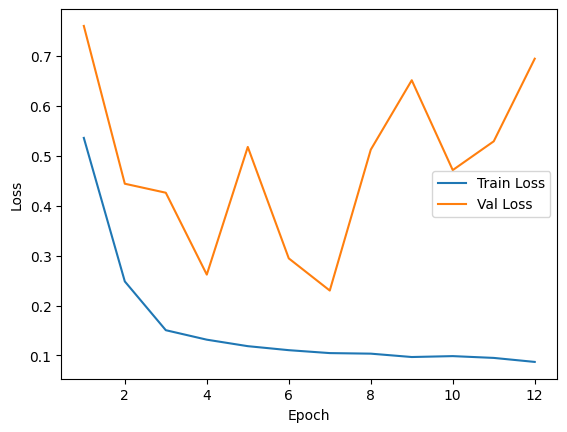

Training Time: 23.63 Minutes


In [ ]:
simple_cnn_noaugment_history = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/simple_cnn_noaugment_history.csv")
plot_loss(simple_cnn_noaugment_history)
print("Training Time: "+str(round(simple_cnn_noaugment_history['Train Time'].sum()/60,2)) + " Minutes")

In [ ]:
simple_cnn_noaugment_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/simple_cnn_noaugment_eval_train.csv", index_col = 0)
simple_cnn_noaugment_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/simple_cnn_noaugment_eval_test.csv", index_col = 0)
simple_cnn_noaugment_eval = compare_eval(simple_cnn_noaugment_eval_train, simple_cnn_noaugment_eval_test)
simple_cnn_noaugment_eval

,Train,Test
Accuracy,0.968774,0.737179
Precision,0.969904,0.706204
Recall,0.988657,0.992308
Balanced Accuracy,0.949959,0.652137
Specificity,0.949959,0.652137


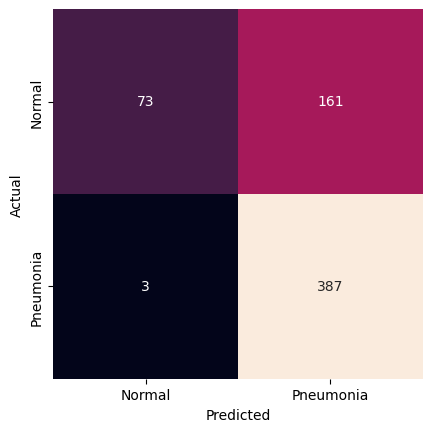

In [ ]:
simple_cnn_noaugment_CM_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/simple_cnn_noaugment_CM_test.csv", index_col = 0)
visualize_CM(simple_cnn_noaugment_CM_test)

#### CNN

In [ ]:
early_stopping = EarlyStopping(patience=5, delta=0)
cnn_noaugment_history_df = train_model(cnn, train_loader_noaugment, val_loader, num_epochs, early_stopping)
early_stopping.load_best_model(cnn)
cnn_noaugment_history_df.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/cnn_noaugment_history.csv")

print("\nChecking accuracy on training data")
cnn_noaugment_eval_train, cnn_noaugment_CM_train = check_accuracy(train_loader_noaugment, cnn)
cnn_noaugment_eval_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/cnn_noaugment_eval_train.csv")
cnn_noaugment_CM_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/cnn_noaugment_CM_train.csv")

print("\nChecking accuracy on testing data")
cnn_noaugment_eval_test, cnn_noaugment_CM_test = check_accuracy(test_loader, cnn)
cnn_noaugment_eval_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/cnn_noaugment_eval_test.csv")
cnn_noaugment_CM_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/cnn_noaugment_CM_test.csv")

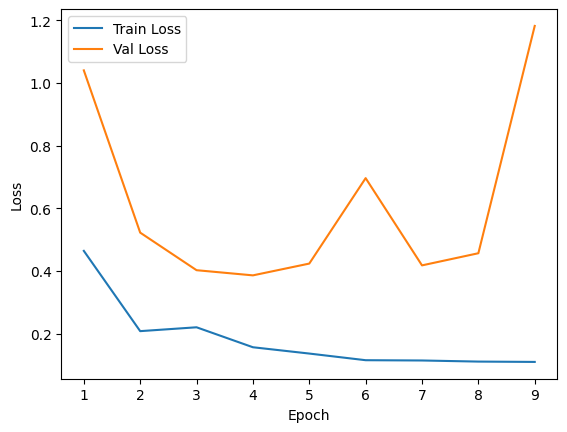

Training Time: 9.97 Minutes


In [ ]:
cnn_noaugment_history = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/cnn_noaugment_history.csv")
plot_loss(cnn_noaugment_history)
print("Training Time: "+str(round(cnn_noaugment_history['Train Time'].sum()/60,2)) + " Minutes")

In [ ]:
cnn_noaugment_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/cnn_noaugment_eval_train.csv", index_col = 0)
cnn_noaugment_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/cnn_noaugment_eval_test.csv", index_col = 0)
cnn_noaugment_eval = compare_eval(cnn_noaugment_eval_train, cnn_noaugment_eval_test)
cnn_noaugment_eval

,Train,Test
Accuracy,0.944444,0.701923
Precision,0.934188,0.677700
Recall,0.995360,0.997436
Balanced Accuracy,0.896263,0.603419
Specificity,0.896263,0.603419


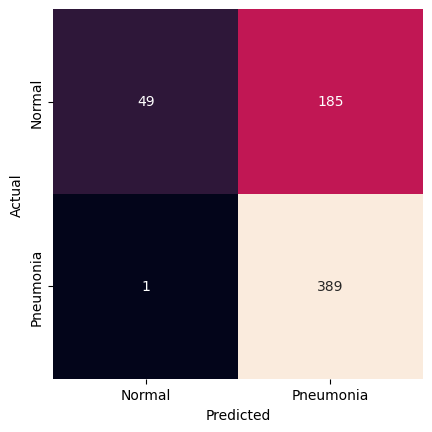

In [ ]:
cnn_noaugment_CM_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/cnn_noaugment_CM_test.csv", index_col = 0)
visualize_CM(cnn_noaugment_CM_test)

### **Model CKAN**

#### Small

In [ ]:
early_stopping = EarlyStopping(patience=5, delta=0)
ckan_noaugment_history_df = train_model(ckan, train_loader_noaugment, val_loader, num_epochs, early_stopping)
early_stopping.load_best_model(ckan)
ckan_noaugment_history_df.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/ckan_noaugment_history.csv")

print("\nChecking accuracy on training data")
ckan_noaugment_eval_train, ckan_noaugment_CM_train = check_accuracy(train_loader_noaugment, ckan)
ckan_noaugment_eval_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/ckan_noaugment_eval_train.csv")
ckan_noaugment_CM_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/ckan_noaugment_CM_train.csv")

print("\nChecking accuracy on testing data")
ckan_noaugment_eval_test, ckan_noaugment_CM_test = check_accuracy(test_loader, ckan)
ckan_noaugment_eval_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/ckan_noaugment_eval_test.csv")
ckan_noaugment_CM_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/ckan_noaugment_CM_test.csv")

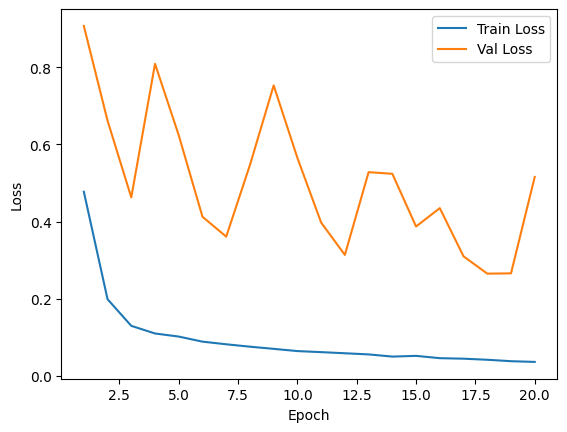

Training Time: 77.87 Minutes


In [ ]:
ckan_noaugment_history = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_noaugment_history.csv")
plot_loss(ckan_noaugment_history)
print("Training Time: "+str(round(ckan_noaugment_history['Train Time'].sum()/60,2)) + " Minutes")

In [ ]:
ckan_noaugment_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_noaugment_eval_train.csv", index_col = 0)
ckan_noaugment_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_noaugment_eval_test.csv", index_col = 0)
ckan_noaugment_eval = compare_eval(ckan_noaugment_eval_train, ckan_noaugment_eval_test)
ckan_noaugment_eval

,Train,Test
Accuracy,0.987739,0.721154
Precision,0.986483,0.692857
Recall,0.997164,0.994872
Balanced Accuracy,0.978821,0.629915
Specificity,0.978821,0.629915


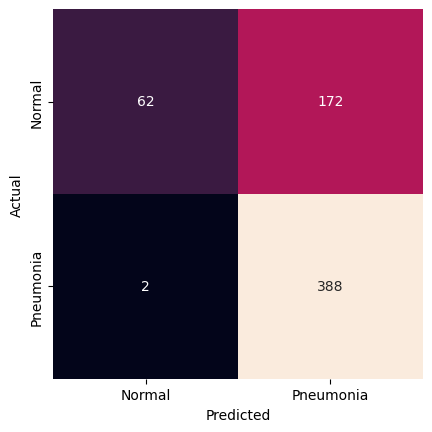

In [ ]:
ckan_noaugment_CM_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_noaugment_CM_test.csv", index_col = 0)
visualize_CM(ckan_noaugment_CM_test)

#### Medium

In [ ]:
early_stopping = EarlyStopping(patience=5, delta=0)
ckan_medium_noaugment_history_df = train_model(ckan_medium, train_loader_noaugment, val_loader, num_epochs, early_stopping)
early_stopping.load_best_model(ckan_medium)
ckan_medium_noaugment_history_df.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/ckan_medium_noaugment_history.csv")

print("\nChecking accuracy on training data")
ckan_medium_noaugment_eval_train, ckan_medium_noaugment_CM_train = check_accuracy(train_loader_noaugment, ckan_medium)
ckan_medium_noaugment_eval_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/ckan_medium_noaugment_eval_train.csv")
ckan_medium_noaugment_CM_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/ckan_medium_noaugment_CM_train.csv")

print("\nChecking accuracy on testing data")
ckan_medium_noaugment_eval_test, ckan_medium_noaugment_CM_test = check_accuracy(test_loader, ckan_medium)
ckan_medium_noaugment_eval_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/ckan_medium_noaugment_eval_test.csv")
ckan_medium_noaugment_CM_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/ckan_medium_noaugment_CM_test.csv")

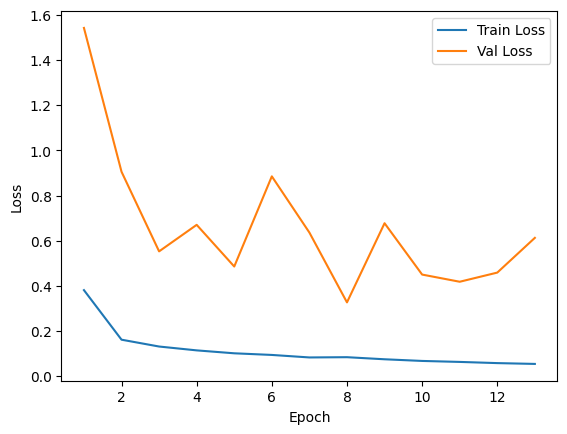

Training Time: 13.34 Minutes


In [ ]:
ckan_medium_noaugment_history = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_medium_noaugment_history.csv")
plot_loss(ckan_medium_noaugment_history)
print("Training Time: "+str(round(ckan_medium_noaugment_history['Train Time'].sum()/60,2)) + " Minutes")

In [ ]:
ckan_medium_noaugment_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_medium_noaugment_eval_train.csv", index_col = 0)
ckan_medium_noaugment_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_medium_noaugment_eval_test.csv", index_col = 0)
ckan_medium_noaugment_eval = compare_eval(ckan_medium_noaugment_eval_train, ckan_medium_noaugment_eval_test)
ckan_medium_noaugment_eval

,Train,Test
Accuracy,0.983525,0.732372
Precision,0.983185,0.701627
Recall,0.994844,0.994872
Balanced Accuracy,0.972814,0.644872
Specificity,0.972814,0.644872


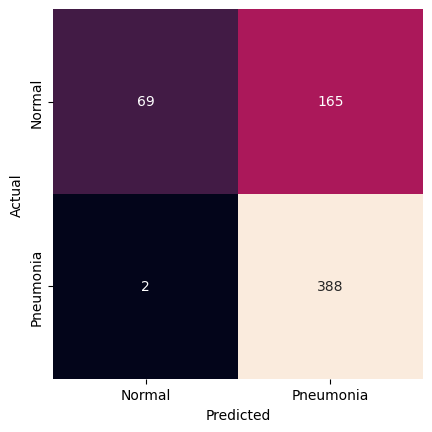

In [ ]:
ckan_medium_noaugment_CM_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_medium_noaugment_CM_test.csv", index_col = 0)
visualize_CM(ckan_medium_noaugment_CM_test)

### **Model KANC_MLP**

#### Small

In [ ]:
early_stopping = EarlyStopping(patience=5, delta=0)
kan_mlp_noaugment_history_df = train_model(kan_mlp, train_loader_noaugment, val_loader, num_epochs, early_stopping)
early_stopping.load_best_model(kan_mlp)
kan_mlp_noaugment_history_df.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/kan_mlp_noaugment_history.csv")

print("\nChecking accuracy on training data")
kan_mlp_noaugment_eval_train, kan_mlp_noaugment_CM_train = check_accuracy(train_loader_noaugment, kan_mlp)
kan_mlp_noaugment_eval_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/kan_mlp_noaugment_eval_train.csv")
kan_mlp_noaugment_CM_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/kan_mlp_noaugment_CM_train.csv")

print("\nChecking accuracy on testing data")
kan_mlp_noaugment_eval_test, kan_mlp_noaugment_CM_test = check_accuracy(test_loader, kan_mlp)
kan_mlp_noaugment_eval_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/kan_mlp_noaugment_eval_test.csv")
kan_mlp_noaugment_CM_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/kan_mlp_noaugment_CM_test.csv")

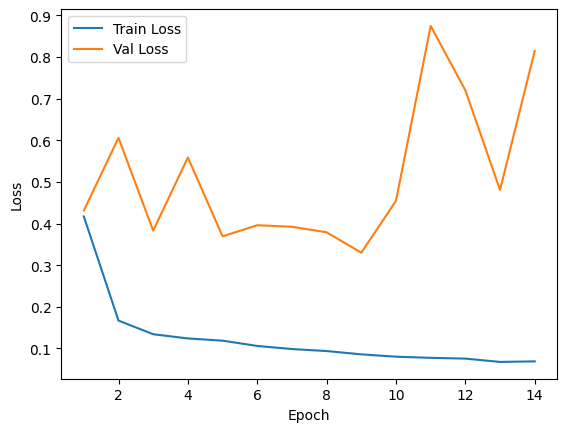

Training Time: 69.17 Minutes


In [ ]:
kan_mlp_noaugment_history = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_noaugment_history.csv")
plot_loss(kan_mlp_noaugment_history)
print("Training Time: "+str(round(kan_mlp_noaugment_history['Train Time'].sum()/60,2)) + " Minutes")

In [ ]:
kan_mlp_noaugment_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_noaugment_eval_train.csv", index_col = 0)
kan_mlp_noaugment_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_noaugment_eval_test.csv", index_col = 0)
kan_mlp_noaugment_eval = compare_eval(kan_mlp_noaugment_eval_train, kan_mlp_noaugment_eval_test)
kan_mlp_noaugment_eval

,Train,Test
Accuracy,0.976628,0.729167
Precision,0.976898,0.700544
Recall,0.992008,0.989744
Balanced Accuracy,0.962074,0.642308
Specificity,0.962074,0.642308


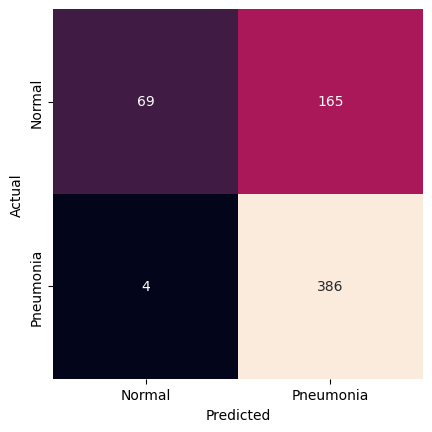

In [ ]:
kan_mlp_noaugment_CM_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_noaugment_CM_test.csv", index_col = 0)
visualize_CM(kan_mlp_noaugment_CM_test)

#### Medium

In [ ]:
early_stopping = EarlyStopping(patience=5, delta=0)
kan_mlp_medium_noaugment_history_df = train_model(kan_mlp_medium, train_loader_noaugment, val_loader, num_epochs, early_stopping)
early_stopping.load_best_model(kan_mlp_medium)
kan_mlp_medium_noaugment_history_df.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/kan_mlp_medium_noaugment_history.csv")

print("\nChecking accuracy on training data")
kan_mlp_medium_noaugment_eval_train, kan_mlp_medium_noaugment_CM_train = check_accuracy(train_loader_noaugment, kan_mlp_medium)
kan_mlp_medium_noaugment_eval_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/kan_mlp_medium_noaugment_eval_train.csv")
kan_mlp_medium_noaugment_CM_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/kan_mlp_medium_noaugment_CM_train.csv")

print("\nChecking accuracy on testing data")
kan_mlp_medium_noaugment_eval_test, kan_mlp_medium_noaugment_CM_test = check_accuracy(test_loader, kan_mlp_medium)
kan_mlp_medium_noaugment_eval_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/kan_mlp_medium_noaugment_eval_test.csv")
kan_mlp_medium_noaugment_CM_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/kan_mlp_medium_noaugment_CM_test.csv")

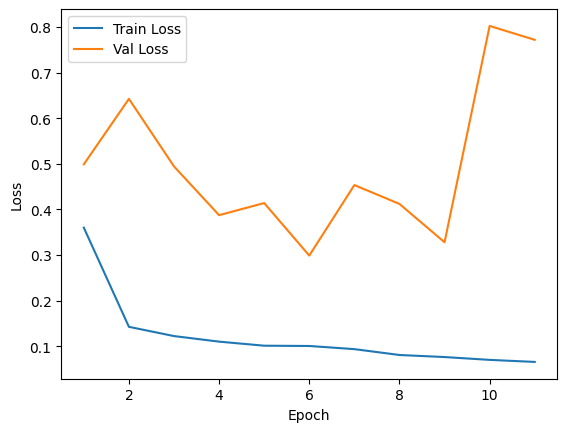

Training Time: 77.77 Minutes


In [ ]:
kan_mlp_medium_noaugment_history = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_medium_noaugment_history.csv")
plot_loss(kan_mlp_medium_noaugment_history)
print("Training Time: "+str(round(kan_mlp_medium_noaugment_history['Train Time'].sum()/60,2)) + " Minutes")

In [ ]:
kan_mlp_medium_noaugment_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_medium_noaugment_eval_train.csv", index_col = 0)
kan_mlp_medium_noaugment_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_medium_noaugment_eval_test.csv", index_col = 0)
kan_mlp_medium_noaugment_eval = compare_eval(kan_mlp_medium_noaugment_eval_train, kan_mlp_medium_noaugment_eval_test)
kan_mlp_medium_noaugment_eval

,Train,Test
Accuracy,0.977395,0.753205
Precision,0.979842,0.720149
Recall,0.989946,0.989744
Balanced Accuracy,0.965517,0.674359
Specificity,0.965517,0.674359


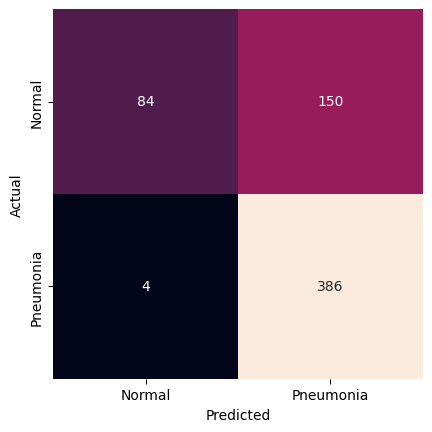

In [ ]:
kan_mlp_medium_noaugment_CM_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_medium_noaugment_CM_test.csv", index_col = 0)
visualize_CM(kan_mlp_medium_noaugment_CM_test)

### **Model KKAN**

#### Small

In [ ]:
early_stopping = EarlyStopping(patience=5, delta=0)
kkan_noaugment_history_df = train_model(kkan, train_loader_noaugment, val_loader, num_epochs, early_stopping)
early_stopping.load_best_model(kkan)
kkan_noaugment_history_df.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/kkan_noaugment_history.csv")

print("\nChecking accuracy on training data")
kkan_noaugment_eval_train, kkan_noaugment_CM_train = check_accuracy(train_loader_noaugment, kkan)
kkan_noaugment_eval_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/kkan_noaugment_eval_train.csv")
kkan_noaugment_CM_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/kkan_noaugment_CM_train.csv")

print("\nChecking accuracy on testing data")
kkan_noaugment_eval_test, kkan_noaugment_CM_test = check_accuracy(test_loader, kkan)
kkan_noaugment_eval_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/kkan_noaugment_eval_test.csv")
kkan_noaugment_CM_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/kkan_noaugment_CM_test.csv")

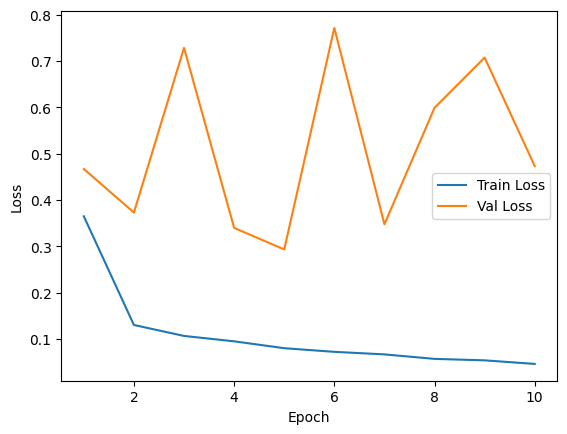

Training Time: 49.53 Minutes


In [ ]:
kkan_noaugment_history = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_noaugment_history.csv")
plot_loss(kkan_noaugment_history)
print("Training Time: "+str(round(kkan_noaugment_history['Train Time'].sum()/60,2)) + " Minutes")

In [ ]:
kkan_noaugment_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_noaugment_eval_train.csv", index_col = 0)
kkan_noaugment_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_noaugment_eval_test.csv", index_col = 0)
kkan_noaugment_eval = compare_eval(kkan_noaugment_eval_train, kkan_noaugment_eval_test)
kkan_noaugment_eval

,Train,Test
Accuracy,0.987931,0.770833
Precision,0.995327,0.736138
Recall,0.988399,0.987179
Balanced Accuracy,0.987488,0.698718
Specificity,0.987488,0.698718


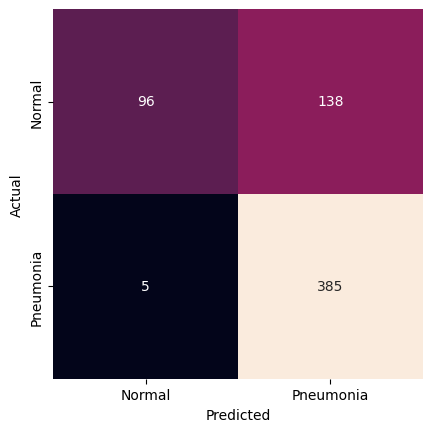

In [ ]:
kkan_noaugment_CM_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_noaugment_CM_test.csv", index_col = 0)
visualize_CM(kkan_noaugment_CM_test)

#### Medium

In [ ]:
early_stopping = EarlyStopping(patience=5, delta=0)
kkan_medium_noaugment_history_df = train_model(kkan_medium, train_loader_noaugment, val_loader, num_epochs, early_stopping)
early_stopping.load_best_model(kkan_medium)
kkan_medium_noaugment_history_df.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/kkan_medium_noaugment_history.csv")

print("\nChecking accuracy on training data")
kkan_medium_noaugment_eval_train, kkan_medium_noaugment_CM_train = check_accuracy(train_loader_noaugment, kkan_medium)
kkan_medium_noaugment_eval_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/kkan_medium_noaugment_eval_train.csv")
kkan_medium_noaugment_CM_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/kkan_medium_noaugment_CM_train.csv")

print("\nChecking accuracy on testing data")
kkan_medium_noaugment_eval_test, kkan_medium_noaugment_CM_test = check_accuracy(test_loader, kkan_medium)
kkan_medium_noaugment_eval_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/kkan_medium_noaugment_eval_test.csv")
kkan_medium_noaugment_CM_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning Group 2/kkan_medium_noaugment_CM_test.csv")

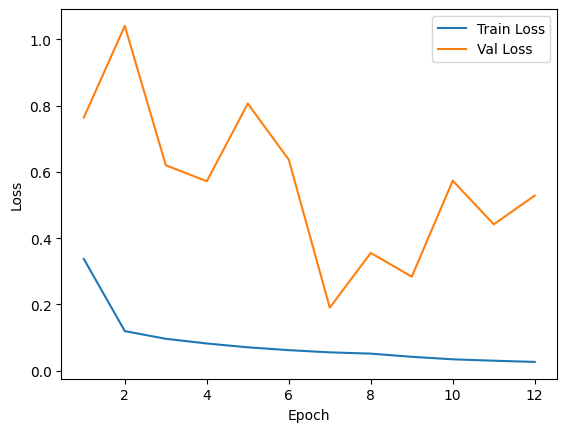

Training Time: 137.28 Minutes


In [ ]:
kkan_medium_noaugment_history = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_medium_noaugment_history.csv")
plot_loss(kkan_medium_noaugment_history)
print("Training Time: "+str(round(kkan_medium_noaugment_history['Train Time'].sum()/60,2)) + " Minutes")

In [ ]:
kkan_medium_noaugment_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_medium_noaugment_eval_train.csv", index_col = 0)
kkan_medium_noaugment_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_medium_noaugment_eval_test.csv", index_col = 0)
kkan_medium_noaugment_eval = compare_eval(kkan_medium_noaugment_eval_train, kkan_medium_noaugment_eval_test)
kkan_medium_noaugment_eval

,Train,Test
Accuracy,0.993295,0.724359
Precision,0.992063,0.696751
Recall,0.998969,0.989744
Balanced Accuracy,0.987926,0.635897
Specificity,0.987926,0.635897


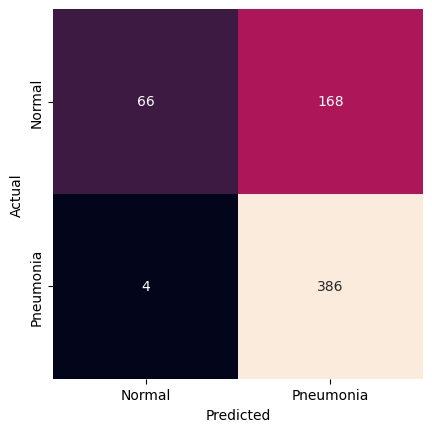

In [ ]:
kkan_medium_noaugment_CM_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_medium_noaugment_CM_test.csv", index_col = 0)
visualize_CM(kkan_medium_noaugment_CM_test)

In [ ]:
simple_cnn_noaugment_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/simple_cnn_noaugment_eval_train.csv", index_col = 0)
simple_cnn_noaugment_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/simple_cnn_noaugment_eval_test.csv", index_col = 0)
cnn_noaugment_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/cnn_noaugment_eval_train.csv", index_col = 0)
cnn_noaugment_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/cnn_noaugment_eval_test.csv", index_col = 0)
ckan_noaugment_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_noaugment_eval_train.csv", index_col = 0)
ckan_noaugment_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_noaugment_eval_test.csv", index_col = 0)
ckan_medium_noaugment_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_medium_noaugment_eval_train.csv", index_col = 0)
ckan_medium_noaugment_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_medium_noaugment_eval_test.csv", index_col = 0)
kan_mlp_noaugment_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_noaugment_eval_train.csv", index_col = 0)
kan_mlp_noaugment_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_noaugment_eval_test.csv", index_col = 0)
kan_mlp_medium_noaugment_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_medium_noaugment_eval_train.csv", index_col = 0)
kan_mlp_medium_noaugment_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_medium_noaugment_eval_test.csv", index_col = 0)
kkan_noaugment_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_noaugment_eval_train.csv", index_col = 0)
kkan_noaugment_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_noaugment_eval_test.csv", index_col = 0)
kkan_medium_noaugment_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_medium_noaugment_eval_train.csv", index_col = 0)
kkan_medium_noaugment_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_medium_noaugment_eval_test.csv", index_col = 0)

noaugment_eval = pd.concat([simple_cnn_noaugment_eval_train,
                            simple_cnn_noaugment_eval_test,
                            cnn_noaugment_eval_train,
                            cnn_noaugment_eval_test,
                            ckan_noaugment_eval_train,
                            ckan_noaugment_eval_test,
                            ckan_medium_noaugment_eval_train,
                            ckan_medium_noaugment_eval_test,
                            kan_mlp_noaugment_eval_train,
                            kan_mlp_noaugment_eval_test,
                            kan_mlp_medium_noaugment_eval_train,
                            kan_mlp_medium_noaugment_eval_test,
                            kkan_noaugment_eval_train,
                            kkan_noaugment_eval_test,
                            kkan_medium_noaugment_eval_train,
                            kkan_medium_noaugment_eval_test], axis = 0)
noaugment_eval.to_csv("/content/drive/MyDrive/Advanced Machine Learning/noaugment_eval.csv")
noaugment_eval

,Accuracy,Precision,Recall,Balanced Accuracy,Specificity
0,0.968774,0.969904,0.988657,0.949959,0.949959
0,0.737179,0.706204,0.992308,0.652137,0.652137
0,0.944444,0.934188,0.995360,0.896263,0.896263
0,0.701923,0.677700,0.997436,0.603419,0.603419
0,0.987739,0.986483,0.997164,0.978821,0.978821
0,0.721154,0.692857,0.994872,0.629915,0.629915
0,0.983525,0.983185,0.994844,0.972814,0.972814
0,0.732372,0.701627,0.994872,0.644872,0.644872
0,0.976628,0.976898,0.992008,0.962074,0.962074
0,0.729167,0.700544,0.989744,0.642308,0.642308


In [ ]:
kkan_medium_noaugment_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_medium_noaugment_eval_train.csv", index_col = 0)
kkan_medium_noaugment_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_medium_noaugment_eval_test.csv", index_col = 0)

## **4.2. Eksperimen Menggunakan Data Dengan Augmentasi**


---



<p align = "justify">$\qquad$Pada bagian ini, seluruh model dilatih menggunakan data yang sudah diseimbangkan dengan augmentasi. Proses pelatihan dan evaluasi dari model mengikuti 4 langkah yang telah dijelaskan sebelumnya. Di bawah ini, setiap model akan diinstansiasi menjadi objek, sehingga siap digunakan untuk proses pelatihan dan evaluasi.

In [ ]:
cnn = CNN(in_channels=1, num_classes=num_classes)
simple_cnn = SimpleCNN(num_classes=num_classes)
ckan = CKAN(num_classes=num_classes)
ckan_medium = CKAN_Medium(num_classes = num_classes)
kan_mlp = KANC_MLP(num_classes=num_classes)
kan_mlp_medium = KANC_MLP_Medium(num_classes=num_classes)
kkan = KKAN(num_classes=num_classes)
kkan_medium = KKAN_medium(num_classes=num_classes)

### **Model CNN**

#### Simple CNN

In [ ]:
early_stopping = EarlyStopping(patience=5, delta=0)
simple_cnn_history_df = train_model(simple_cnn, train_loader, val_loader, num_epochs, early_stopping)
early_stopping.load_best_model(simple_cnn)
simple_cnn_history_df.to_csv("/content/drive/MyDrive/Advanced Machine Learning/simple_cnn_history.csv")

print("\nChecking accuracy on training data")
simple_cnn_eval_train, simple_cnn_CM_train = check_accuracy(train_loader, simple_cnn)
simple_cnn_eval_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/simple_cnn_eval_train.csv")
simple_cnn_CM_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/simple_cnn_CM_train.csv")

print("\nChecking accuracy on testing data")
simple_cnn_eval_test, simple_cnn_CM_test = check_accuracy(test_loader, simple_cnn)
simple_cnn_eval_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/simple_cnn_eval_test.csv")
simple_cnn_CM_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/simple_cnn_CM_test.csv")

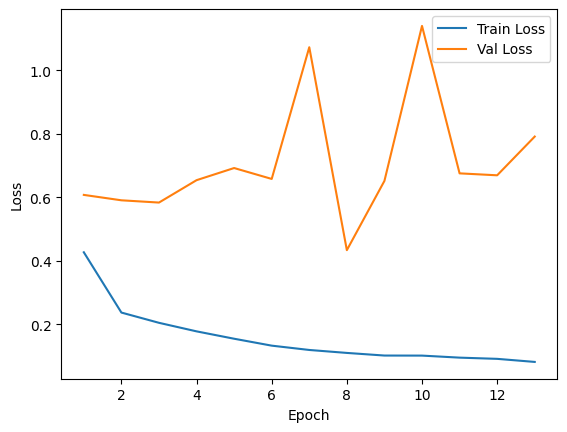

Training Time: 59.4 Minutes


In [ ]:
simple_cnn_history = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/simple_cnn_history.csv")
plot_loss(simple_cnn_history)
print("Training Time: "+str(round(simple_cnn_history['Train Time'].sum()/60,2)) + " Minutes")

In [ ]:
simple_cnn_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/simple_cnn_eval_train.csv", index_col = 0)
simple_cnn_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/simple_cnn_eval_test.csv", index_col = 0)
simple_cnn_eval = compare_eval(simple_cnn_eval_train, simple_cnn_eval_test)
simple_cnn_eval

,Train,Test
Accuracy,0.968806,0.782051
Precision,0.961900,0.745174
Recall,0.976283,0.989744
Balanced Accuracy,0.968806,0.712821
Specificity,0.968806,0.712821


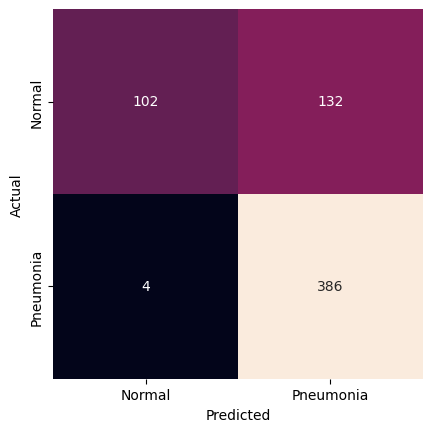

In [ ]:
simple_cnn_CM_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/simple_cnn_CM_test.csv", index_col = 0)
visualize_CM(simple_cnn_CM_test)

#### CNN

In [ ]:
early_stopping = EarlyStopping(patience=5, delta=0)
cnn_history_df = train_model(cnn, train_loader, val_loader, num_epochs, early_stopping)
early_stopping.load_best_model(cnn)
cnn_history_df.to_csv("/content/drive/MyDrive/Advanced Machine Learning/cnn_history.csv")

print("\nChecking accuracy on training data")
cnn_eval_train, cnn_CM_train = check_accuracy(train_loader, cnn)
cnn_eval_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/cnn_eval_train.csv")
cnn_CM_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/cnn_CM_train.csv")

print("\nChecking accuracy on testing data")
cnn_eval_test, cnn_CM_test = check_accuracy(test_loader, cnn)
cnn_eval_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/cnn_eval_test.csv")
cnn_CM_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/cnn_CM_test.csv")

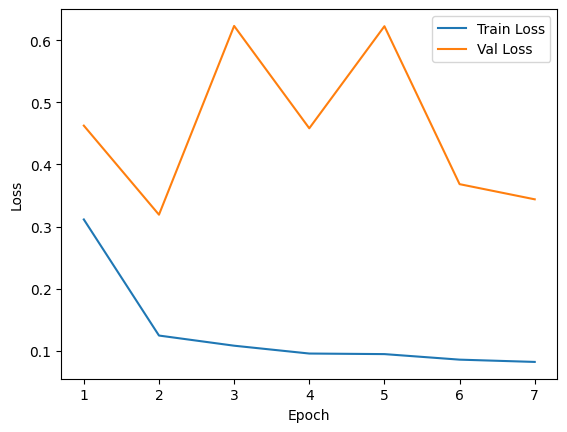

Training Time: 28.34 Minutes


In [ ]:
cnn_history = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/cnn_history.csv")
plot_loss(cnn_history)
print("Training Time: "+str(round(cnn_history['Train Time'].sum()/60,2)) + " Minutes")

In [ ]:
cnn_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/cnn_eval_train.csv", index_col = 0)
cnn_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/cnn_eval_test.csv", index_col = 0)
cnn_eval = compare_eval(cnn_eval_train, cnn_eval_test)
cnn_eval

,Train,Test
Accuracy,0.965806,0.754808
Precision,0.956962,0.721495
Recall,0.975484,0.989744
Balanced Accuracy,0.965806,0.676496
Specificity,0.965806,0.676496


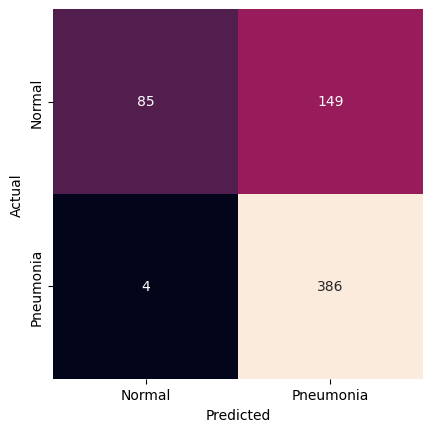

In [ ]:
cnn_CM_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/cnn_CM_test.csv", index_col = 0)
visualize_CM(cnn_CM_test)

### **Model CKAN**

#### Small

In [ ]:
early_stopping = EarlyStopping(patience=5, delta=0)
ckan_history_df = train_model(ckan, train_loader, val_loader, num_epochs, early_stopping)
early_stopping.load_best_model(ckan)
ckan_history_df.to_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_history.csv")

print("\nChecking accuracy on training data")
ckan_eval_train, ckan_CM_train = check_accuracy(train_loader, ckan)
ckan_eval_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_eval_train.csv")
ckan_CM_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_CM_train.csv")

print("\nChecking accuracy on testing data")
ckan_eval_test, ckan_CM_test = check_accuracy(test_loader, ckan)
ckan_eval_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_eval_test.csv")
ckan_CM_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_CM_test.csv")

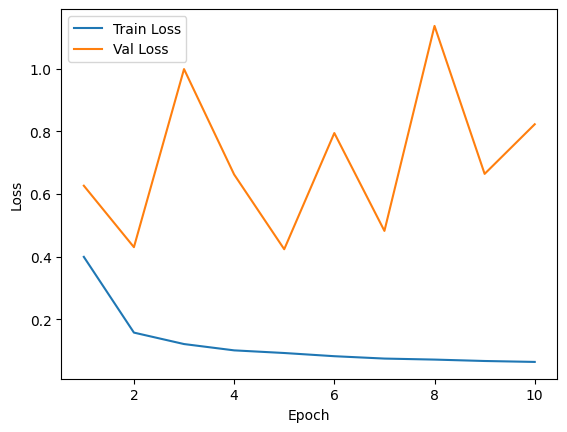

Training Time: 19.82 Minutes


In [ ]:
ckan_history = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_history.csv")
plot_loss(ckan_history)
print("Training Time: "+str(round(ckan_history['Train Time'].sum()/60,2)) + " Minutes")

In [ ]:
ckan_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_eval_train.csv", index_col = 0)
ckan_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_eval_test.csv", index_col = 0)
ckan_eval = compare_eval(ckan_eval_train, ckan_eval_test)
ckan_eval

,Train,Test
Accuracy,0.981290,0.782051
Precision,0.977226,0.743295
Recall,0.985548,0.994872
Balanced Accuracy,0.981290,0.711111
Specificity,0.981290,0.711111


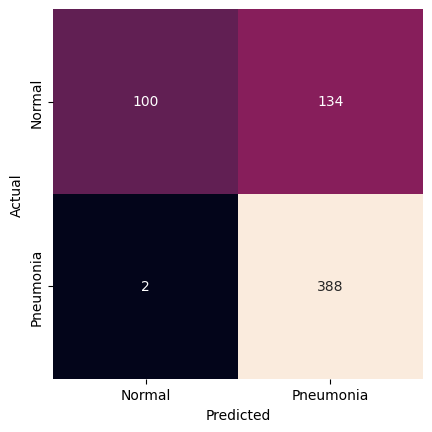

In [ ]:
ckan_CM_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_CM_test.csv", index_col = 0)
visualize_CM(ckan_CM_test)

#### Medium

In [ ]:
early_stopping = EarlyStopping(patience=5, delta=0)
ckan_medium_history_df = train_model(ckan_medium, train_loader, val_loader, num_epochs, early_stopping)
early_stopping.load_best_model(ckan_medium)
ckan_medium_history_df.to_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_medium_history.csv")

print("\nChecking accuracy on training data")
ckan_medium_eval_train, ckan_medium_CM_train = check_accuracy(train_loader, ckan_medium)
ckan_medium_eval_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_medium_eval_train.csv")
ckan_medium_CM_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_medium_CM_train.csv")

print("\nChecking accuracy on testing data")
ckan_medium_eval_test, ckan_medium_CM_test = check_accuracy(test_loader, ckan_medium)
ckan_medium_eval_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_medium_eval_test.csv")
ckan_medium_CM_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_medium_CM_test.csv")

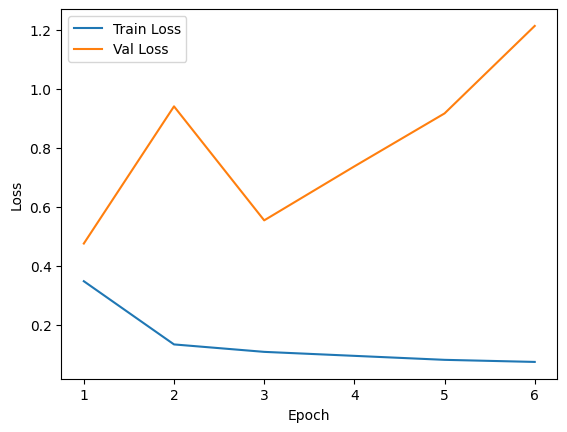

Training Time: 11.99 Minutes


In [ ]:
ckan_medium_history = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_medium_history.csv")
plot_loss(ckan_medium_history)
print("Training Time: "+str(round(ckan_medium_history['Train Time'].sum()/60,2)) + " Minutes")

In [ ]:
ckan_medium_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_medium_eval_train.csv", index_col = 0)
ckan_medium_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_medium_eval_test.csv", index_col = 0)
ckan_medium_eval = compare_eval(ckan_medium_eval_train, ckan_medium_eval_test)
ckan_medium_eval

,Train,Test
Accuracy,0.972258,0.764423
Precision,0.959799,0.727103
Recall,0.985806,0.997436
Balanced Accuracy,0.972258,0.686752
Specificity,0.972258,0.686752


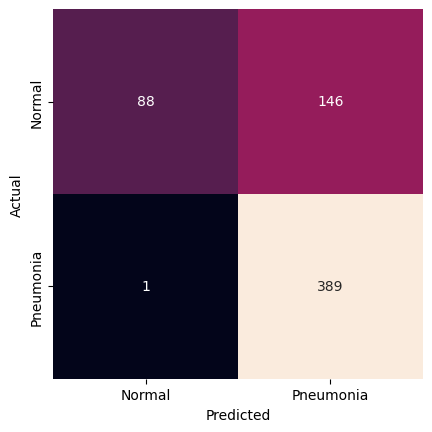

In [ ]:
ckan_medium_CM_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_medium_CM_test.csv", index_col = 0)
visualize_CM(ckan_medium_CM_test)

### **Model KANC_MLP**

#### Small

In [ ]:
early_stopping = EarlyStopping(patience=5, delta=0)
kan_mlp_history_df = train_model(kan_mlp, train_loader, val_loader, num_epochs, early_stopping)
early_stopping.load_best_model(kan_mlp)
kan_mlp_history_df.to_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_history.csv")

print("\nChecking accuracy on training data")
kan_mlp_eval_train, kan_mlp_CM_train = check_accuracy(train_loader, kan_mlp)
kan_mlp_eval_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_eval_train.csv")
kan_mlp_CM_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_CM_train.csv")

print("\nChecking accuracy on testing data")
kan_mlp_eval_test, kan_mlp_CM_test = check_accuracy(test_loader, kan_mlp)
kan_mlp_eval_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_eval_test.csv")
kan_mlp_CM_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_CM_test.csv")

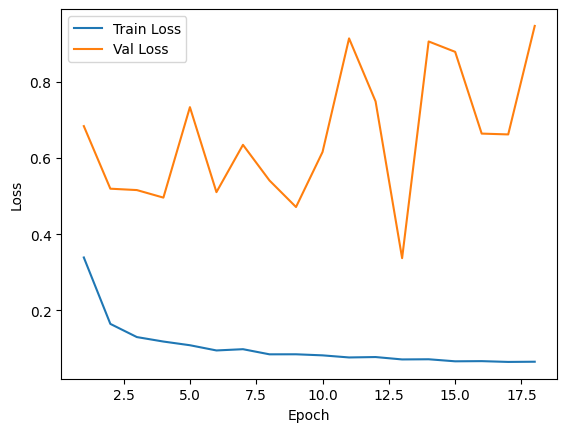

Training Time: 141.63 Minutes


In [ ]:
kan_mlp_history = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_history.csv")
plot_loss(kan_mlp_history)
print("Training Time: "+str(round(kan_mlp_history['Train Time'].sum()/60,2)) + " Minutes")

In [ ]:
kan_mlp_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_eval_train.csv", index_col = 0)
kan_mlp_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_eval_test.csv", index_col = 0)
kan_mlp_eval = compare_eval(kan_mlp_eval_train, kan_mlp_eval_test)
kan_mlp_eval

,Train,Test
Accuracy,0.973677,0.753205
Precision,0.957161,0.716912
Recall,0.991742,1.000000
Balanced Accuracy,0.973677,0.670940
Specificity,0.973677,0.670940


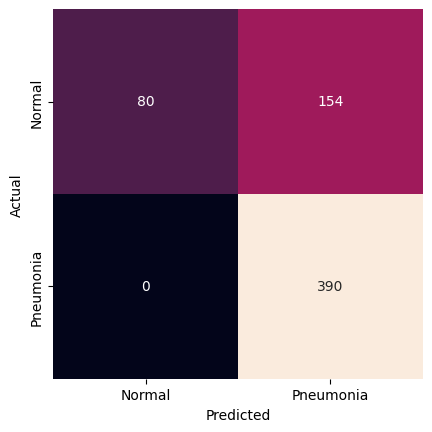

In [ ]:
kan_mlp_CM_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_CM_test.csv", index_col = 0)
visualize_CM(kan_mlp_CM_test)

#### Medium

In [ ]:
early_stopping = EarlyStopping(patience=5, delta=0)
kan_mlp_medium_history_df = train_model(kan_mlp_medium, train_loader, val_loader, num_epochs, early_stopping)
early_stopping.load_best_model(kan_mlp_medium)
kan_mlp_medium_history_df.to_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_medium_history.csv")

print("\nChecking accuracy on training data")
kan_mlp_medium_eval_train, kan_mlp_medium_CM_train = check_accuracy(train_loader, kan_mlp_medium)
kan_mlp_medium_eval_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_medium_eval_train.csv")
kan_mlp_medium_CM_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_medium_CM_train.csv")

print("\nChecking accuracy on testing data")
kan_mlp_medium_eval_test, kan_mlp_medium_CM_test = check_accuracy(test_loader, kan_mlp_medium)
kan_mlp_medium_eval_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_medium_eval_test.csv")
kan_mlp_medium_CM_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_medium_CM_test.csv")

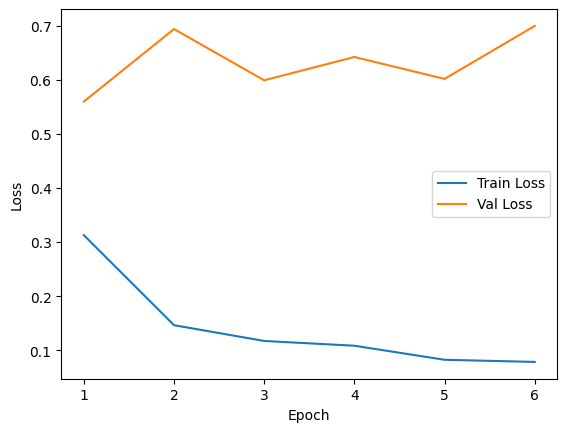

Training Time: 66.16 Minutes


In [ ]:
kan_mlp_medium_history = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_medium_history.csv")
plot_loss(kan_mlp_medium_history)
print("Training Time: "+str(round(kan_mlp_medium_history['Train Time'].sum()/60,2)) + " Minutes")

In [ ]:
kan_mlp_medium_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_medium_eval_train.csv", index_col = 0)
kan_mlp_medium_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_medium_eval_test.csv", index_col = 0)
kan_mlp_medium_eval = compare_eval(kan_mlp_medium_eval_train, kan_mlp_medium_eval_test)
kan_mlp_medium_eval

,Train,Test
Accuracy,0.977935,0.762821
Precision,0.970528,0.728302
Recall,0.985806,0.989744
Balanced Accuracy,0.977935,0.687179
Specificity,0.977935,0.687179


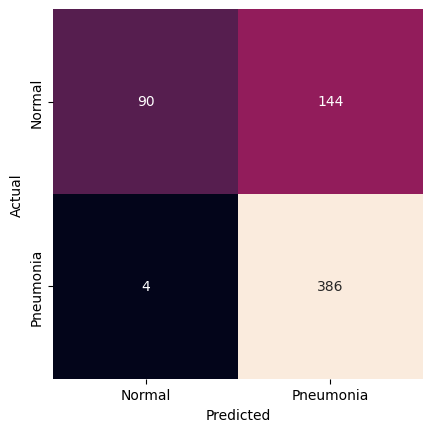

In [ ]:
kan_mlp_medium_CM_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_medium_CM_test.csv", index_col = 0)
visualize_CM(kan_mlp_medium_CM_test)

### **Model KKAN**

#### Small

In [ ]:
early_stopping = EarlyStopping(patience=5, delta=0)
kkan_history_df = train_model(kkan, train_loader, val_loader, num_epochs, early_stopping)
early_stopping.load_best_model(kkan)
kkan_history_df.to_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_history.csv")

print("\nChecking accuracy on training data")
kkan_eval_train, kkan_CM_train = check_accuracy(train_loader, kkan)
kkan_eval_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_eval_train.csv")
kkan_CM_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_CM_train.csv")

print("\nChecking accuracy on testing data")
kkan_eval_test, kkan_CM_test = check_accuracy(test_loader, kkan)
kkan_eval_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_eval_test.csv")
kkan_CM_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_CM_test.csv")

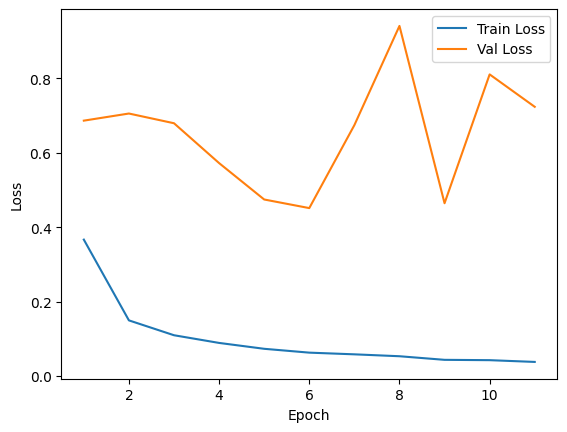

Training Time: 74.24 Minutes


In [ ]:
kkan_history = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_history.csv")
plot_loss(kkan_history)
print("Training Time: "+str(round(kkan_history['Train Time'].sum()/60,2)) + " Minutes")

In [ ]:
kkan_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_eval_train.csv", index_col = 0)
kkan_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_eval_test.csv", index_col = 0)
kkan_eval = compare_eval(kkan_eval_train, kkan_eval_test)
kkan_eval

,Train,Test
Accuracy,0.988774,0.777244
Precision,0.982179,0.739962
Recall,0.995613,0.992308
Balanced Accuracy,0.988774,0.705556
Specificity,0.988774,0.705556


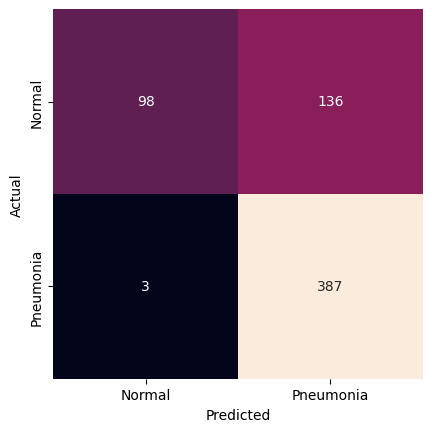

In [ ]:
kkan_CM_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_CM_test.csv", index_col = 0)
visualize_CM(kkan_CM_test)

#### Medium

In [ ]:
early_stopping = EarlyStopping(patience=5, delta=0)
kkan_medium_history_df = train_model(kkan_medium, train_loader, val_loader, num_epochs, early_stopping)
early_stopping.load_best_model(kkan_medium)
kkan_medium_history_df.to_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_medium_history.csv")

print("\nChecking accuracy on training data")
kkan_medium_eval_train, kkan_medium_CM_train = check_accuracy(train_loader, kkan_medium)
kkan_medium_eval_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_medium_eval_train.csv")
kkan_medium_CM_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_medium_CM_train.csv")

print("\nChecking accuracy on testing data")
kkan_medium_eval_test, kkan_medium_CM_test = check_accuracy(test_loader, kkan_medium)
kkan_medium_eval_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_medium_eval_test.csv")
kkan_medium_CM_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_medium_CM_test.csv")

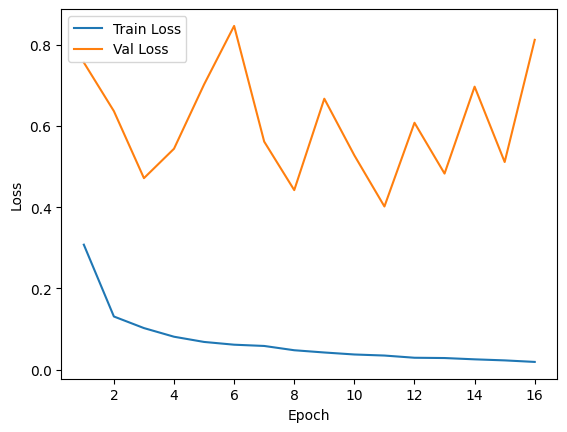

Training Time: 178.49 Minutes


In [ ]:
kkan_medium_history = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_medium_history.csv")
plot_loss(kkan_medium_history)
print("Training Time: "+str(round(kkan_medium_history['Train Time'].sum()/60,2)) + " Minutes")

In [ ]:
kkan_medium_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_medium_eval_train.csv", index_col = 0)
kkan_medium_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_medium_eval_test.csv", index_col = 0)
kkan_medium_eval = compare_eval(kkan_medium_eval_train, kkan_medium_eval_test)
kkan_medium_eval

,Train,Test
Accuracy,0.992000,0.788462
Precision,0.985732,0.750000
Recall,0.998452,0.992308
Balanced Accuracy,0.992000,0.720513
Specificity,0.992000,0.720513


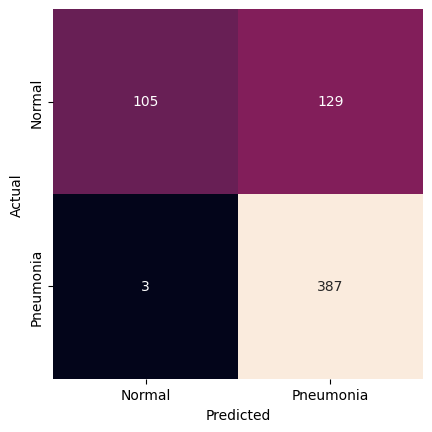

In [ ]:
kkan_medium_CM_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_medium_CM_test.csv", index_col = 0)
visualize_CM(kkan_medium_CM_test)

In [ ]:
simple_cnn_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/simple_cnn_eval_train.csv", index_col = 0)
simple_cnn_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/simple_cnn_eval_test.csv", index_col = 0)
cnn_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/cnn_eval_train.csv", index_col = 0)
cnn_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/cnn_eval_test.csv", index_col = 0)
ckan_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_eval_train.csv", index_col = 0)
ckan_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_eval_test.csv", index_col = 0)
ckan_medium_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_medium_eval_train.csv", index_col = 0)
ckan_medium_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/ckan_medium_eval_test.csv", index_col = 0)
kan_mlp_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_eval_train.csv", index_col = 0)
kan_mlp_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_eval_test.csv", index_col = 0)
kan_mlp_medium_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_medium_eval_train.csv", index_col = 0)
kan_mlp_medium_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kan_mlp_medium_eval_test.csv", index_col = 0)
kkan_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_eval_train.csv", index_col = 0)
kkan_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_eval_test.csv", index_col = 0)
kkan_medium_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_medium_eval_train.csv", index_col = 0)
kkan_medium_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/kkan_medium_eval_test.csv", index_col = 0)

augment_eval = pd.concat([simple_cnn_eval_train,
                            simple_cnn_eval_test,
                            cnn_eval_train,
                            cnn_eval_test,
                            ckan_eval_train,
                            ckan_eval_test,
                            ckan_medium_eval_train,
                            ckan_medium_eval_test,
                            kan_mlp_eval_train,
                            kan_mlp_eval_test,
                            kan_mlp_medium_eval_train,
                            kan_mlp_medium_eval_test,
                            kkan_eval_train,
                            kkan_eval_test,
                            kkan_medium_eval_train,
                            kkan_medium_eval_test], axis = 0)
augment_eval.to_csv("/content/drive/MyDrive/Advanced Machine Learning/eval.csv")
augment_eval

,Accuracy,Precision,Recall,Balanced Accuracy,Specificity
0,0.968806,0.961900,0.976283,0.968806,0.968806
0,0.782051,0.745174,0.989744,0.712821,0.712821
0,0.965806,0.956962,0.975484,0.965806,0.965806
0,0.754808,0.721495,0.989744,0.676496,0.676496
0,0.981290,0.977226,0.985548,0.981290,0.981290
0,0.782051,0.743295,0.994872,0.711111,0.711111
0,0.972258,0.959799,0.985806,0.972258,0.972258
0,0.764423,0.727103,0.997436,0.686752,0.686752
0,0.973677,0.957161,0.991742,0.973677,0.973677
0,0.753205,0.716912,1.000000,0.670940,0.670940


## **4.3. Eksperimen Menggunakan Data Dengan Augmentasi Tanpa Early Stopping**


---



<p align = "justify">$\qquad$Seperti yang telah dijelaskan sebelumnya, penulis memiliki kecurigaan bahwa data validasi mungkin bukan representatif yang baik dari data <i>testing</i>, sehingga eksperimen akan diulang sekali lagi menggunakan data augmentasi, namun tanpa penggunaan <i>early stopping</i>. Jumlah <i>epoch</i> yang dipilih adalah 10. Proses pelatihan dan evaluasi dari model mengikuti 4 langkah yang telah dijelaskan sebelumnya. Di bawah ini, setiap model akan diinstansiasi menjadi objek, sehingga siap digunakan untuk proses pelatihan dan evaluasi.

In [ ]:
cnn = CNN(in_channels=1, num_classes=num_classes)
simple_cnn = SimpleCNN(num_classes=num_classes)
ckan = CKAN(num_classes=num_classes)
ckan_medium = CKAN_Medium(num_classes = num_classes)
kan_mlp = KANC_MLP(num_classes=num_classes)
kan_mlp_medium = KANC_MLP_Medium(num_classes=num_classes)
kkan = KKAN(num_classes=num_classes)
kkan_medium = KKAN_medium(num_classes=num_classes)

Karena sebelumnya sudah didefinisikan variabel <code>num_epoch</code> dengan nilai sebesar 20, maka variabel ini perlu didefinisikan ulang dengan nilai sebesar 10.

In [ ]:
num_epochs = 10

### **Model CNN**

#### Simple CNN

In [ ]:
simple_cnn_history_df = train_model(simple_cnn, train_loader, val_loader, num_epochs)
simple_cnn_history_df.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/simple_cnn_history.csv")

print("\nChecking accuracy on training data")
simple_cnn_eval_train, simple_cnn_CM_train = check_accuracy(train_loader, simple_cnn)
simple_cnn_eval_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/simple_cnn_eval_train.csv")
simple_cnn_CM_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/simple_cnn_CM_train.csv")

print("\nChecking accuracy on testing data")
simple_cnn_eval_test, simple_cnn_CM_test = check_accuracy(test_loader, simple_cnn)
simple_cnn_eval_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/simple_cnn_eval_test.csv")
simple_cnn_CM_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/simple_cnn_CM_test.csv")

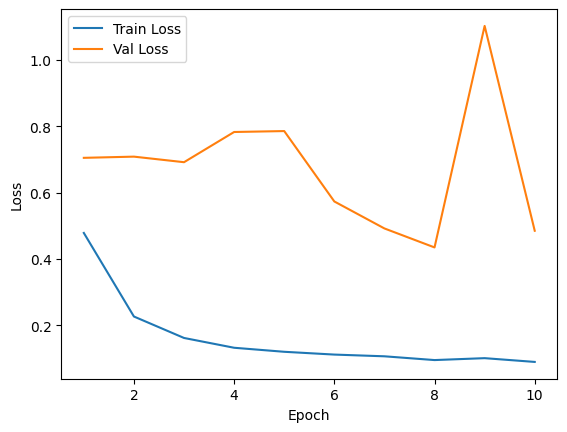

Training Time: 43.32 Minutes


In [ ]:
simple_cnn_history = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/simple_cnn_history.csv")
plot_loss(simple_cnn_history)
print("Training Time: "+str(round(simple_cnn_history['Train Time'].sum()/60,2)) + " Minutes")

In [ ]:
simple_cnn_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/simple_cnn_eval_train.csv", index_col = 0)
simple_cnn_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/simple_cnn_eval_test.csv", index_col = 0)
simple_cnn_eval = compare_eval(simple_cnn_eval_train, simple_cnn_eval_test)
simple_cnn_eval

,Train,Test
Accuracy,0.968258,0.810897
Precision,0.982195,0.779835
Recall,0.953806,0.971795
Balanced Accuracy,0.968258,0.757265
Specificity,0.968258,0.757265


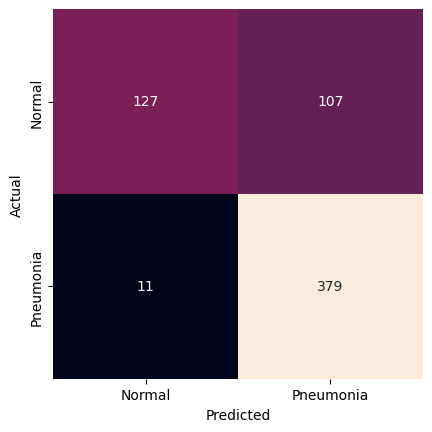

In [ ]:
simple_cnn_CM_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/simple_cnn_CM_test.csv", index_col = 0)
visualize_CM(simple_cnn_CM_test)

#### CNN

In [ ]:
cnn_history_df = train_model(cnn, train_loader, val_loader, num_epochs)
cnn_history_df.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/cnn_history.csv")

print("\nChecking accuracy on training data")
cnn_eval_train, cnn_CM_train = check_accuracy(train_loader, cnn)
cnn_eval_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/cnn_eval_train.csv")
cnn_CM_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/cnn_CM_train.csv")

print("\nChecking accuracy on testing data")
cnn_eval_test, cnn_CM_test = check_accuracy(test_loader, cnn)
cnn_eval_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/cnn_eval_test.csv")
cnn_CM_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/cnn_CM_test.csv")

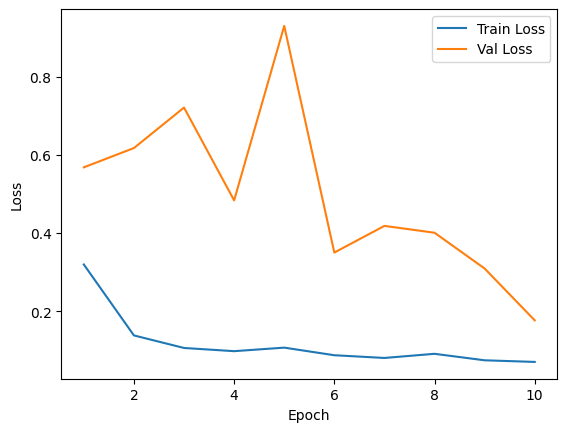

Training Time: 24.19 Minutes


In [ ]:
cnn_history = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/cnn_history.csv")
plot_loss(cnn_history)
print("Training Time: "+str(round(cnn_history['Train Time'].sum()/60,2)) + " Minutes")

In [ ]:
cnn_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/cnn_eval_train.csv", index_col = 0)
cnn_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/cnn_eval_test.csv", index_col = 0)
cnn_eval = compare_eval(cnn_eval_train, cnn_eval_test)
cnn_eval

,Train,Test
Accuracy,0.974968,0.786859
Precision,0.983452,0.752456
Recall,0.966194,0.982051
Balanced Accuracy,0.974968,0.721795
Specificity,0.974968,0.721795


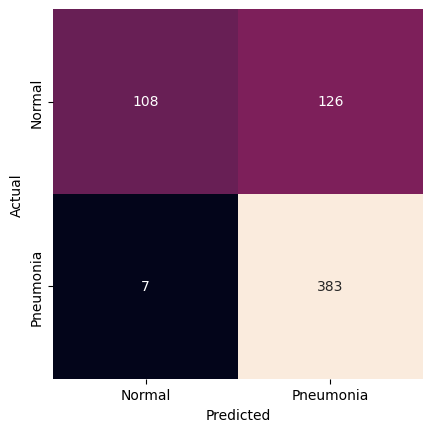

In [ ]:
cnn_CM_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/cnn_CM_test.csv", index_col = 0)
visualize_CM(cnn_CM_test)

### **Model CKAN**

#### Small

In [ ]:
early_stopping = EarlyStopping(patience=5, delta=0)
ckan_history_df = train_model(ckan, train_loader, val_loader, num_epochs)
early_stopping.load_best_model(ckan)
ckan_history_df.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/ckan_history.csv")

print("\nChecking accuracy on training data")
ckan_eval_train, ckan_CM_train = check_accuracy(train_loader, ckan)
ckan_eval_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/ckan_eval_train.csv")
ckan_CM_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/ckan_CM_train.csv")

print("\nChecking accuracy on testing data")
ckan_eval_test, ckan_CM_test = check_accuracy(test_loader, ckan)
ckan_eval_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/ckan_eval_test.csv")
ckan_CM_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/ckan_CM_test.csv")

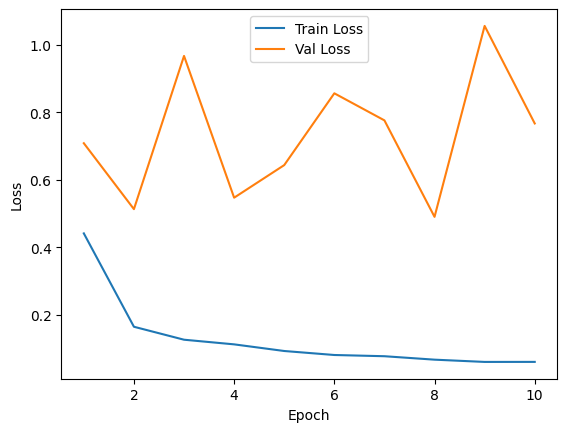

Training Time: 31.95 Minutes


In [ ]:
ckan_history = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/ckan_history.csv")
plot_loss(ckan_history)
print("Training Time: "+str(round(ckan_history['Train Time'].sum()/60,2)) + " Minutes")

In [ ]:
ckan_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/ckan_eval_train.csv", index_col = 0)
ckan_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/ckan_eval_test.csv", index_col = 0)
ckan_eval = compare_eval(ckan_eval_train, ckan_eval_test)
ckan_eval

,Train,Test
Accuracy,0.980387,0.783654
Precision,0.978904,0.748538
Recall,0.981935,0.984615
Balanced Accuracy,0.980387,0.716667
Specificity,0.980387,0.716667


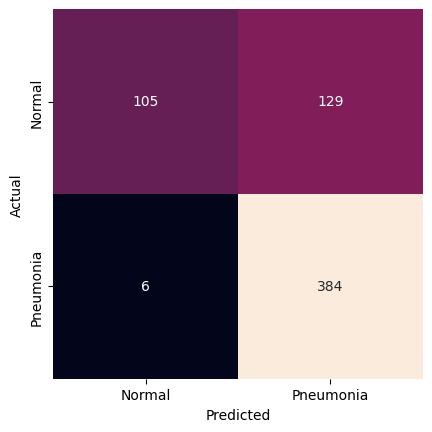

In [ ]:
ckan_CM_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/ckan_CM_test.csv", index_col = 0)
visualize_CM(ckan_CM_test)

#### Medium

In [ ]:
ckan_medium_history_df = train_model(ckan_medium, train_loader, val_loader, num_epochs)
ckan_medium_history_df.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/ckan_medium_history.csv")

print("\nChecking accuracy on training data")
ckan_medium_eval_train, ckan_medium_CM_train = check_accuracy(train_loader, ckan_medium)
ckan_medium_eval_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/ckan_medium_eval_train.csv")
ckan_medium_CM_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/ckan_medium_CM_train.csv")

print("\nChecking accuracy on testing data")
ckan_medium_eval_test, ckan_medium_CM_test = check_accuracy(test_loader, ckan_medium)
ckan_medium_eval_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/ckan_medium_eval_test.csv")
ckan_medium_CM_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/ckan_medium_CM_test.csv")

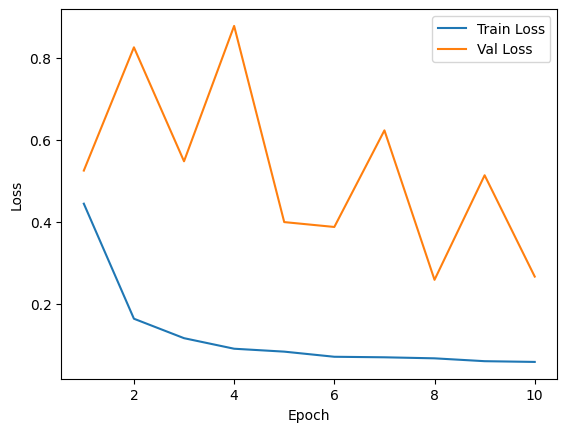

Training Time: 23.14 Minutes


In [ ]:
ckan_medium_history = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/ckan_medium_history.csv")
plot_loss(ckan_medium_history)
print("Training Time: "+str(round(ckan_medium_history['Train Time'].sum()/60,2)) + " Minutes")

In [ ]:
ckan_medium_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/ckan_medium_eval_train.csv", index_col = 0)
ckan_medium_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/ckan_medium_eval_test.csv", index_col = 0)
ckan_medium_eval = compare_eval(ckan_medium_eval_train, ckan_medium_eval_test)
ckan_medium_eval

,Train,Test
Accuracy,0.979613,0.834936
Precision,0.991277,0.799582
Recall,0.967742,0.982051
Balanced Accuracy,0.979613,0.785897
Specificity,0.979613,0.785897


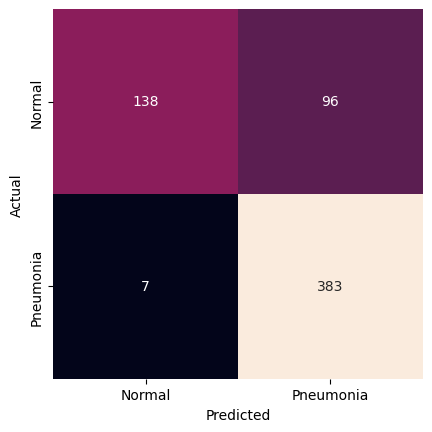

In [ ]:
ckan_medium_CM_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/ckan_medium_CM_test.csv", index_col = 0)
visualize_CM(ckan_medium_CM_test)

### **Model KANC_MLP**

#### Small

In [ ]:
kan_mlp_history_df = train_model(kan_mlp, train_loader, val_loader, num_epochs)
kan_mlp_history_df.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kan_mlp_history.csv")

print("\nChecking accuracy on training data")
kan_mlp_eval_train, kan_mlp_CM_train = check_accuracy(train_loader, kan_mlp)
kan_mlp_eval_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kan_mlp_eval_train.csv")
kan_mlp_CM_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kan_mlp_CM_train.csv")

print("\nChecking accuracy on testing data")
kan_mlp_eval_test, kan_mlp_CM_test = check_accuracy(test_loader, kan_mlp)
kan_mlp_eval_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kan_mlp_eval_test.csv")
kan_mlp_CM_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kan_mlp_CM_test.csv")

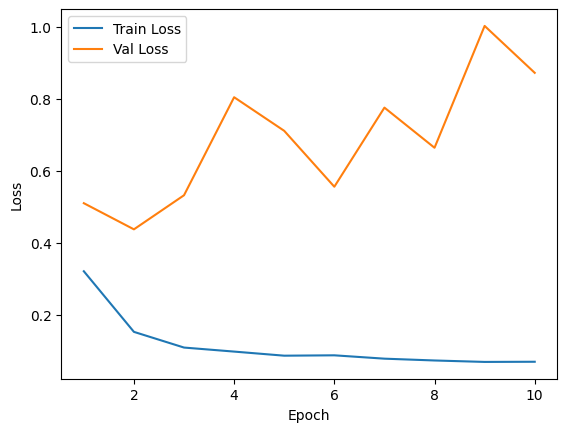

Training Time: 379.31 Minutes


In [ ]:
kan_mlp_history = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kan_mlp_history.csv")
plot_loss(kan_mlp_history)
print("Training Time: "+str(round(kan_mlp_history['Train Time'].sum()/60,2)) + " Minutes")

In [ ]:
kan_mlp_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kan_mlp_eval_train.csv", index_col = 0)
kan_mlp_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kan_mlp_eval_test.csv", index_col = 0)
kan_mlp_eval = compare_eval(kan_mlp_eval_train, kan_mlp_eval_test)
kan_mlp_eval

,Train,Test
Accuracy,0.972774,0.758013
Precision,0.960765,0.722533
Recall,0.985806,0.994872
Balanced Accuracy,0.972774,0.679060
Specificity,0.972774,0.679060


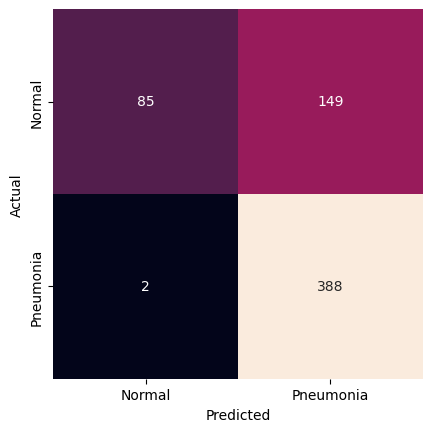

In [ ]:
kan_mlp_CM_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kan_mlp_CM_test.csv", index_col = 0)
visualize_CM(kan_mlp_CM_test)

#### Medium

In [ ]:
kan_mlp_medium_history_df = train_model(kan_mlp_medium, train_loader, val_loader, num_epochs)
kan_mlp_medium_history_df.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kan_mlp_medium_history.csv")

print("\nChecking accuracy on training data")
kan_mlp_medium_eval_train, kan_mlp_medium_CM_train = check_accuracy(train_loader, kan_mlp_medium)
kan_mlp_medium_eval_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kan_mlp_medium_eval_train.csv")
kan_mlp_medium_CM_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kan_mlp_medium_CM_train.csv")

print("\nChecking accuracy on testing data")
kan_mlp_medium_eval_test, kan_mlp_medium_CM_test = check_accuracy(test_loader, kan_mlp_medium)
kan_mlp_medium_eval_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kan_mlp_medium_eval_test.csv")
kan_mlp_medium_CM_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kan_mlp_medium_CM_test.csv")

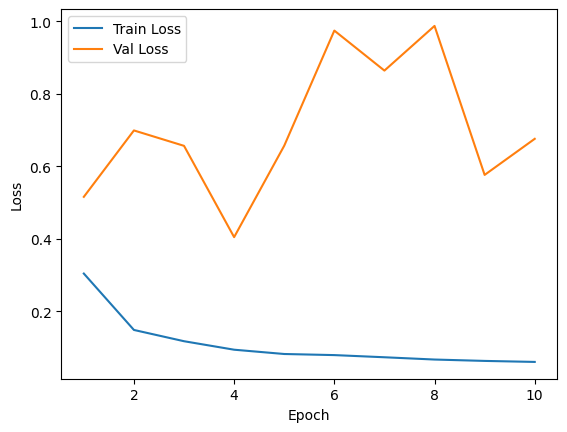

Training Time: 590.1 Minutes


In [ ]:
kan_mlp_medium_history = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kan_mlp_medium_history.csv")
plot_loss(kan_mlp_medium_history)
print("Training Time: "+str(round(kan_mlp_medium_history['Train Time'].sum()/60,2)) + " Minutes")

In [ ]:
kan_mlp_medium_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kan_mlp_medium_eval_train.csv", index_col = 0)
kan_mlp_medium_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kan_mlp_medium_eval_test.csv", index_col = 0)
kan_mlp_medium_eval = compare_eval(kan_mlp_medium_eval_train, kan_mlp_medium_eval_test)
kan_mlp_medium_eval

,Train,Test
Accuracy,0.978065,0.762821
Precision,0.971734,0.728302
Recall,0.984774,0.989744
Balanced Accuracy,0.978065,0.687179
Specificity,0.978065,0.687179


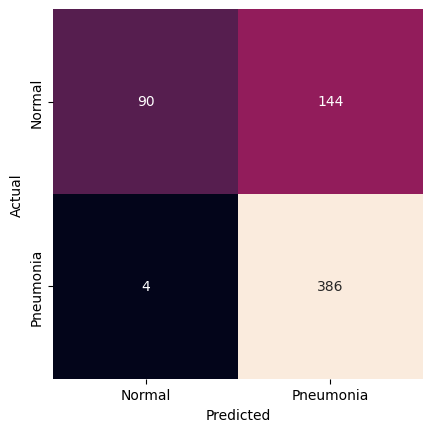

In [ ]:
kan_mlp_medium_CM_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kan_mlp_medium_CM_test.csv", index_col = 0)
visualize_CM(kan_mlp_medium_CM_test)

### **Model KKAN**

#### Small

In [ ]:
kkan_history_df = train_model(kkan, train_loader, val_loader, num_epochs)
kkan_history_df.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kkan_history.csv")

print("\nChecking accuracy on training data")
kkan_eval_train, kkan_CM_train = check_accuracy(train_loader, kkan)
kkan_eval_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kkan_eval_train.csv")
kkan_CM_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kkan_CM_train.csv")

print("\nChecking accuracy on testing data")
kkan_eval_test, kkan_CM_test = check_accuracy(test_loader, kkan)
kkan_eval_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kkan_eval_test.csv")
kkan_CM_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kkan_CM_test.csv")

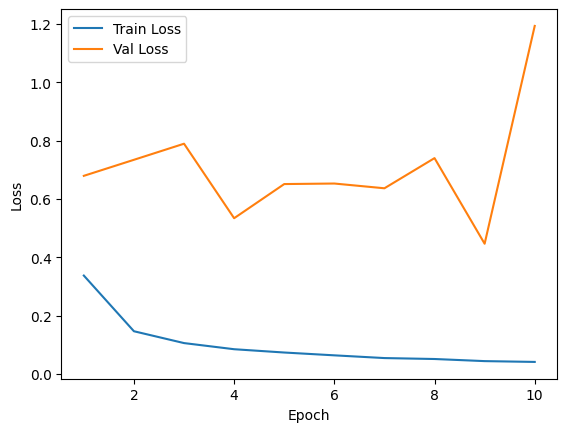

Training Time: 404.3 Minutes


In [ ]:
kkan_history = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kkan_history.csv")
plot_loss(kkan_history)
print("Training Time: "+str(round(kkan_history['Train Time'].sum()/60,2)) + " Minutes")

In [ ]:
kkan_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kkan_eval_train.csv", index_col = 0)
kkan_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kkan_eval_test.csv", index_col = 0)
kkan_eval = compare_eval(kkan_eval_train, kkan_eval_test)
kkan_eval

,Train,Test
Accuracy,0.978065,0.756410
Precision,0.960020,0.722015
Recall,0.997677,0.992308
Balanced Accuracy,0.978065,0.677778
Specificity,0.978065,0.677778


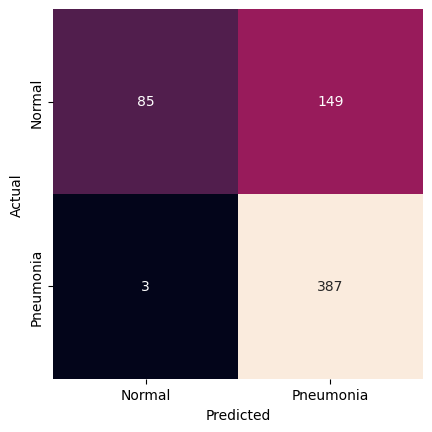

In [ ]:
kkan_CM_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kkan_CM_test.csv", index_col = 0)
visualize_CM(kkan_CM_test)

#### Medium

In [ ]:
kkan_medium_history_df = train_model(kkan_medium, train_loader, val_loader, num_epochs)
kkan_medium_history_df.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kkan_medium_history.csv")

print("\nChecking accuracy on training data")
kkan_medium_eval_train, kkan_medium_CM_train = check_accuracy(train_loader, kkan_medium)
kkan_medium_eval_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kkan_medium_eval_train.csv")
kkan_medium_CM_train.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kkan_medium_CM_train.csv")

print("\nChecking accuracy on testing data")
kkan_medium_eval_test, kkan_medium_CM_test = check_accuracy(test_loader, kkan_medium)
kkan_medium_eval_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kkan_medium_eval_test.csv")
kkan_medium_CM_test.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kkan_medium_CM_test.csv")

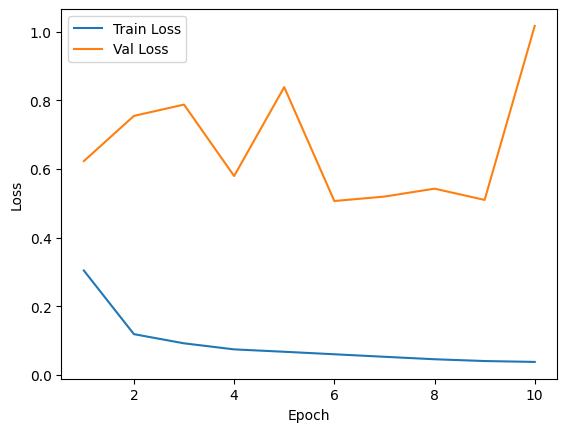

Training Time: 608.81 Minutes


In [ ]:
kkan_medium_history = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kkan_medium_history.csv")
plot_loss(kkan_medium_history)
print("Training Time: "+str(round(kkan_medium_history['Train Time'].sum()/60,2)) + " Minutes")

In [ ]:
kkan_medium_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kkan_medium_eval_train.csv", index_col = 0)
kkan_medium_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kkan_medium_eval_test.csv", index_col = 0)
kkan_medium_eval = compare_eval(kkan_medium_eval_train, kkan_medium_eval_test)
kkan_medium_eval

,Train,Test
Accuracy,0.984258,0.758013
Precision,0.972551,0.721707
Recall,0.996645,0.997436
Balanced Accuracy,0.984258,0.678205
Specificity,0.984258,0.678205


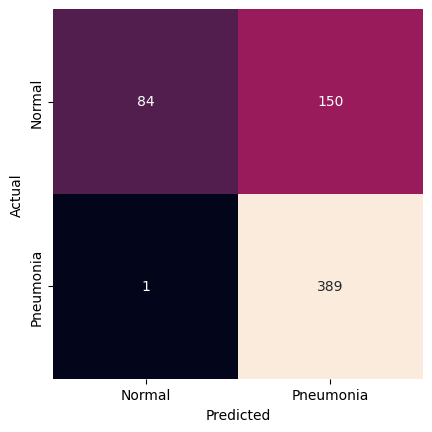

In [ ]:
kkan_medium_CM_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kkan_medium_CM_test.csv", index_col = 0)
visualize_CM(kkan_medium_CM_test)

In [ ]:
simple_cnn_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/simple_cnn_eval_train.csv", index_col = 0)
simple_cnn_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/simple_cnn_eval_test.csv", index_col = 0)
cnn_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/cnn_eval_train.csv", index_col = 0)
cnn_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/cnn_eval_test.csv", index_col = 0)
ckan_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/ckan_eval_train.csv", index_col = 0)
ckan_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/ckan_eval_test.csv", index_col = 0)
ckan_medium_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/ckan_medium_eval_train.csv", index_col = 0)
ckan_medium_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/ckan_medium_eval_test.csv", index_col = 0)
kan_mlp_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kan_mlp_eval_train.csv", index_col = 0)
kan_mlp_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kan_mlp_eval_test.csv", index_col = 0)
kan_mlp_medium_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kan_mlp_medium_eval_train.csv", index_col = 0)
kan_mlp_medium_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kan_mlp_medium_eval_test.csv", index_col = 0)
kkan_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kkan_eval_train.csv", index_col = 0)
kkan_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kkan_eval_test.csv", index_col = 0)
kkan_medium_eval_train = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kkan_medium_eval_train.csv", index_col = 0)
kkan_medium_eval_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/kkan_medium_eval_test.csv", index_col = 0)

augment_noES_eval = pd.concat([simple_cnn_eval_train,
                            simple_cnn_eval_test,
                            cnn_eval_train,
                            cnn_eval_test,
                            ckan_eval_train,
                            ckan_eval_test,
                            ckan_medium_eval_train,
                            ckan_medium_eval_test,
                            kan_mlp_eval_train,
                            kan_mlp_eval_test,
                            kan_mlp_medium_eval_train,
                            kan_mlp_medium_eval_test,
                            kkan_eval_train,
                            kkan_eval_test,
                            kkan_medium_eval_train,
                            kkan_medium_eval_test], axis = 0)
augment_noES_eval.to_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/augment_noES_eval.csv")
augment_noES_eval

,Accuracy,Precision,Recall,Balanced Accuracy,Specificity
0,0.968258,0.982195,0.953806,0.968258,0.968258
0,0.810897,0.779835,0.971795,0.757265,0.757265
0,0.974968,0.983452,0.966194,0.974968,0.974968
0,0.786859,0.752456,0.982051,0.721795,0.721795
0,0.980387,0.978904,0.981935,0.980387,0.980387
0,0.783654,0.748538,0.984615,0.716667,0.716667
0,0.979613,0.991277,0.967742,0.979613,0.979613
0,0.834936,0.799582,0.982051,0.785897,0.785897
0,0.972774,0.960765,0.985806,0.972774,0.972774
0,0.758013,0.722533,0.994872,0.679060,0.679060


## **4.4. Analisis Hasil**


---



<p align="justify"> $\qquad$Hasil penelitian menunjukkan bahwa model <i>baseline</i> terbaik dihasilkan oleh model <i>CNN</i> sederhana (<code>SimpleCNN</code>), dengan menggunakan data yang telah diseimbangkan melalui augmentasi dan tanpa penerapan <i>early stopping</i>. Model ini mencatat nilai <i>accuracy</i>, <i>precision</i>, <i>recall</i>, <i>specificity</i>, dan <i>balanced accuracy</i> berturut-turut sebesar 81%, 77.98%, 97.18%, 75.73%, dan 75.73%. Hasil ini menunjukkan bahwa pendekatan sederhana dapat menghasilkan performa yang kompetitif pada dataset yang telah diseimbangkan, terutama dalam mendeteksi kelas <i>pneumonia</i> (ditunjukkan oleh <i>recall</i> yang tinggi). Namun, performa model masih terbatas dalam mendeteksi kelas normal, sebagaimana tercermin dari nilai <i>specificity</i> yang lebih rendah.

<p align = "justify">$\qquad$Di sisi lain, model usulan terbaik dihasilkan oleh <i>CKAN</i> dengan arsitektur menengah (<code>CKAN_Medium</code>), juga menggunakan data yang telah diseimbangkan melalui augmentasi tanpa <i>early stopping</i>. Model ini mencatat peningkatan pada seluruh metrik evaluasi dibandingkan <code>SimpleCNN</code>, dengan nilai <i>accuracy</i>, <i>precision</i>, <i>recall</i>, <i>specificity</i>, dan <i>balanced accuracy</i> berturut-turut sebesar 83.49%, 79.96%, 98.21%, 78.59%, dan 78.59%. Peningkatan performa pada <i>specificity</i> menunjukkan bahwa model ini lebih efektif dalam mengenali kelas <i>pneumonia</i>, selain mempertahankan kemampuan yang sangat baik dalam mendeteksi kelas normal (ditunjukkan oleh <i>recall</i> yang tinggi).

<p align="justify"> $\qquad$Perbedaan yang cukup signifikan antara nilai <i>accuracy</i> dan <i>balanced accuracy</i> pada data <i>training</i> dan <i>testing</i> menunjukkan adanya indikasi <i>overfitting</i> pada model. Namun, jarak antara nilai <i>training</i> dan <i>testing</i> pada model <i>CKAN Medium</i> terlihat lebih dekat dibandingkan dengan <i>Simple CNN</i>. Hal ini menunjukkan bahwa <i>CKAN Medium</i> memiliki kemampuan generalisasi yang lebih baik, sehingga lebih efektif dalam mempertahankan performanya pada data yang belum terlihat dibandingkan <i>Simple CNN</i>, yang cenderung lebih rentan terhadap <i>overfitting</i>. </p>

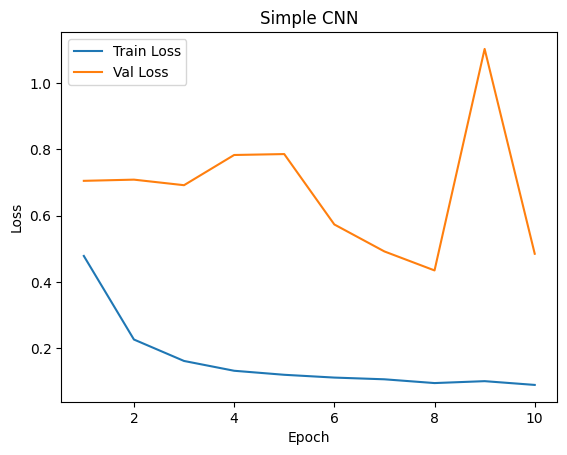

In [ ]:
simple_cnn_history = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/simple_cnn_history.csv")
plt.title("Simple CNN")
plot_loss(simple_cnn_history)

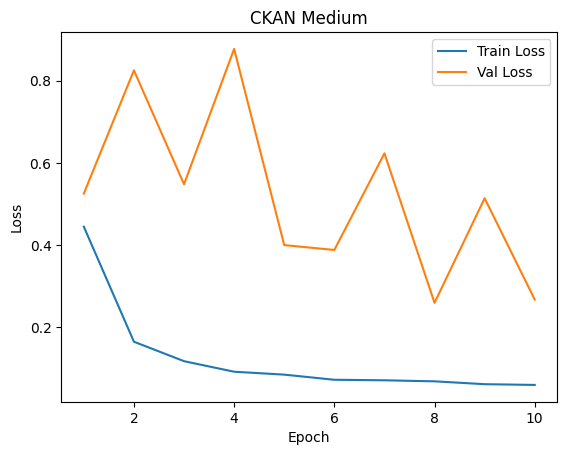

In [ ]:
ckan_medium_history = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/ckan_medium_history.csv")
plt.title("CKAN Medium")
plot_loss(ckan_medium_history)

<p align="justify"> $\qquad$Dari grafik riwayat <i>loss</i>, terlihat bahwa kedua model dapat mempelajari data <i>training</i> dengan baik, ditunjukkan oleh kurva <i>train loss</i> yang konsisten menurun. Namun, terdapat perbedaan signifikan dalam pola <i>validation loss</i> antara kedua model. Pada <i>Simple CNN</i>, <i>validation loss</i> cenderung lebih stabil di awal pelatihan tetapi menunjukkan lonjakan pada epoch akhir, mengindikasikan adanya <i>overfitting</i> terhadap data pelatihan. Sebaliknya, <i>CKAN Medium</i> memiliki <i>validation loss</i> yang lebih fluktuatif tetapi menunjukkan kesenjangan (<i>gap</i>) yang lebih kecil antara <i>train</i> dan <i>validation loss</i>, menandakan kemampuan generalisasi yang lebih baik dibandingkan <i>Simple CNN</i>.

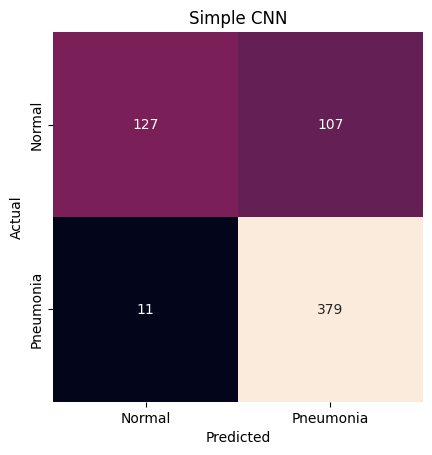

In [ ]:
simple_cnn_CM_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/simple_cnn_CM_test.csv", index_col = 0)
plt.title("Simple CNN")
visualize_CM(simple_cnn_CM_test)

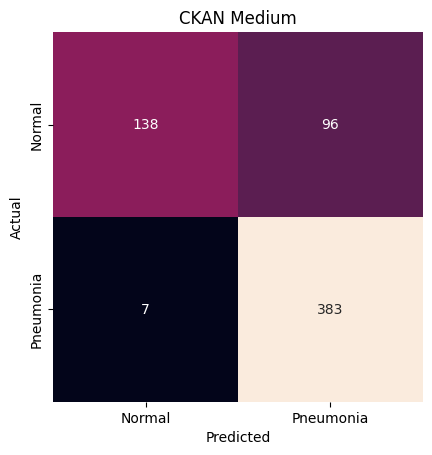

In [ ]:
ckan_medium_CM_test = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/No Early Stopping/ckan_medium_CM_test.csv", index_col = 0)
plt.title("CKAN Medium")
visualize_CM(ckan_medium_CM_test)


<p align="justify"> $\qquad$Hasil <i>confusion matrix</i> kembali menegaskan bahwa model <i>CKAN Medium</i> memiliki kinerja yang lebih baik dalam mengenali kelas normal dan kelas <i>pneumonia</i>. Hal ini tercermin dari jumlah <i>True Positive</i> (<i>TP</i>) dan <i>True Negative</i> (<i>TN</i>) yang dihasilkan, yaitu masing-masing 383 dan 138 untuk <i>CKAN Medium</i>, dibandingkan dengan 379 dan 127 pada <i>Simple CNN</i>. Dalam konteks deteksi <i>pneumonia</i>, kemampuan untuk mendeteksi kasus <i>pneumonia</i> secara akurat (yang diwakili oleh <i>TP</i>) memiliki prioritas lebih tinggi dibandingkan dengan deteksi kelas normal, mengingat implikasi klinis yang lebih kritis. </p>

<p align = "justify">$\qquad$Secara keseluruhan, hasil ini menunjukkan keunggulan model <i>CKAN</i> dalam menangkap hubungan non-linear yang kompleks melalui kombinasi <i>convolutional layers</i> dan <i>KAN linear layers</i>. Dengan peningkatan yang signifikan pada metrik-metrik evaluasi utama, model ini membuktikan efektivitasnya dibandingkan model <i>baseline</i>. Selain itu, penggunaan augmentasi data memberikan kontribusi besar dalam meningkatkan performa kedua model, terutama dalam mengatasi ketidakseimbangan data, sementara desain arsitektur <code>CKAN_Medium</code> lebih unggul dalam generalisasi dan prediksi pada kedua kelas.

# **V. KESIMPULAN**


---



---



<p align="justify"> $\qquad$Berdasarkan hasil penelitian, model terbaik adalah <i>CKAN Medium</i>. Model yang diusulkan ini menunjukkan performa yang lebih unggul dibandingkan model <i>baseline</i>, yaitu <i>Simple CNN</i>. Arsitektur <i>CKAN Medium</i> dengan data input yang telah diaugmentasi berhasil mencapai akurasi sebesar 83.49%, precision sebesar 79.96%, recall sebesar 98.21%, balanced accuracy sebesar 78.59%, dan specificity sebesar 78.59%. Dibandingkan <i>Simple CNN</i>, model <i>CKAN Medium</i> menunjukkan keunggulan yang konsisten, khususnya dalam mendeteksi kelas minoritas, sekaligus mempertahankan kemampuan generalisasi yang lebih baik. Meskipun begitu, performa model belum sepenuhnya optimal dalam menghasilkan skor yang sangat tinggi pada metrik evaluasi tertentu, seperti specificity, yang tetap dapat ditingkatkan lebih lanjut. </p> <p align="justify"> $\qquad$Selain itu, model ini memiliki potensi besar untuk memberikan kontribusi signifikan dalam bidang radiografi dada, terutama dalam membantu mengatasi kekurangan radiografer secara global, termasuk di Indonesia. Dengan kemampuannya mendeteksi pneumonia secara otomatis melalui data X-ray, model ini dapat menjadi alat bantu diagnostik yang efisien, meskipun belum dapat sepenuhnya diandalkan untuk keputusan akhir. Oleh karena itu, model ini sebaiknya digunakan sebagai pendukung diagnosis oleh tenaga medis profesional, bukan sebagai pengganti. </p> <p align="justify"> $\qquad$Ke depan, penelitian lebih lanjut diperlukan untuk meningkatkan performa model, khususnya pada aspek <i>specificity</i> dan stabilitas pelatihan. Penyesuaian arsitektur model, penggunaan dataset yang lebih besar dan bervariasi, serta eksplorasi teknik augmentasi tambahan dapat dilakukan untuk mengoptimalkan kemampuan model. Selain itu, penerapan mekanisme <i>early stopping</i> atau <i>learning rate scheduler</i> dapat membantu meningkatkan stabilitas dan efisiensi pelatihan, sehingga model menjadi lebih andal untuk aplikasi klinis yang lebih luas. </p>

# **REFERENSI**

**[1]**	S. Sharma and K. Guleria, ‘A systematic literature review on deep learning approaches for pneumonia detection using chest X-ray images’, Multimedia Tools and Applications, vol. 83, no. 8, pp. 24101–24151, 2024.

**[2]**	Y. Li, Z. Zhang, C. Dai, Q. Dong, and S. Badrigilan, ‘Accuracy of deep learning for automated detection of pneumonia using chest X-Ray images: A systematic review and meta-analysis’, Computers in Biology and Medicine, vol. 123, p. 103898, 2020.

**[3]**	S. S. Kshatri and D. Singh, ‘Convolutional Neural Network in Medical Image Analysis: A Review’, Archives of Computational Methods in Engineering, vol. 30, no. 4, pp. 2793–2810, May 2023.

**[4]**	A. D. Bodner, A. S. Tepsich, J. N. Spolski, and S. Pourteau, ‘Convolutional Kolmogorov-Arnold Networks’, arXiv [cs.CV]. 2024.

**[5]** M. Abdou, ‘Literature review: efficient deep neural networks techniques for medical image analysis’, Neural Computing and Applications, vol. 34, pp. 1–22, 04 2022.

**[6]** T. Rahman et al., ‘Transfer learning with deep convolutional neural network (CNN) for pneumonia detection using chest X-ray’, Applied Sciences, vol. 10, no. 9, p. 3233, 2020.

**[7]** D. Zhang, F. Ren, Y. Li, L. Na, and Y. Ma, ‘Pneumonia Detection from Chest X-ray Images Based on Convolutional Neural Network’, Electronics, vol. 10, no. 13, 2021.

**[8]**	R. Kundu, R. Das, Z. W. Geem, G.-T. Han, and R. Sarkar, ‘Pneumonia detection in chest X-ray images using an ensemble of deep learning models’, PloS one, vol. 16, no. 9, p. e0256630, 2021.

**[9]**	M. Yaseliani, A. Z. Hamadani, A. I. Maghsoodi, and A. Mosavi, ‘Pneumonia detection proposing a hybrid deep convolutional neural network based on two parallel visual geometry group architectures and machine learning classifiers’, IEEE access, vol. 10, pp. 62110–62128, 2022.

**[10]**	H. Gm, M. K. Gourisaria, S. S. Rautaray, and M. Pandey, ‘Pneumonia detection using CNN through chest X-ray’, Journal of Engineering Science and Technology (JESTEC), vol. 16, no. 1, pp. 861–876, 2021.

**[11]**	T.-T.-H. Le, Y. Hwang, H. Kang, and H. Kim, ‘Robust Credit Card Fraud Detection Based on Efficient Kolmogorov-Arnold Network Models’, IEEE Access, vol. 12, pp. 157006–157020, 2024.

**[12]**	I. Drokin, ‘Kolmogorov-arnold convolutions: Design principles and empirical studies’, arXiv preprint arXiv:2407. 01092, 2024.

**[13]**	M. Cheon and C. Mun, ‘Combining KAN with CNN: KonvNeXt’s Performance in Remote Sensing and Patent Insights’, Remote Sensing, vol. 16, no. 18, 2024.

**[14]**	M. Abd Elaziz, I. A. Fares, and A. O. Aseeri, ‘CKAN: Convolutional Kolmogorov--Arnold Networks Model for Intrusion Detection in IoT Environment’, IEEE Access, 2024.

**[15]** D. S. Kermany, K. Zhang, and M. H. Goldbaum, ‘Large Dataset of Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images’, 2018.

**[16]** A. K. Kushwaha and S. Rastogi, ‘Solution to OCT Diagnosis Using Simple Baseline CNN Models and Hyperparameter Tuning’, in International Conference on Innovative Computing and Communications, 2022, pp. 353–366.

**[17]** R. Aljarrah et al., ‘Application of Artificial Neural Network-Based Tool for Short Circuit Currents Estimation in Power Systems With High Penetration of Power Electronics-Based Renewables’, IEEE Access, vol. 11, pp. 20051–20062, 2023.

**[18]** Z. Liu et al., ‘KAN: Kolmogorov-Arnold Networks’, arXiv [cs.LG]. 2024.

**[19]** S. Cong and Y. Zhou, ‘A review of convolutional neural network architectures and their optimizations’, Artificial Intelligence Review, vol. 56, no. 3, pp. 1905–1969, 2023.

**[20]** H.-C. Chen et al., ‘AlexNet Convolutional Neural Network for Disease Detection and Classification of Tomato Leaf’, Electronics, 2022.